## 1. ÌôòÍ≤Ω ÏÑ§Ï†ï  
ÌïÑÏöî ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º ÏûÑÌè¨Ìä∏ÌïòÍ≥†, ÌïúÍ∏Ä Ìè∞Ìä∏Î•º ÏÑ§Ï†ïÌï©ÎãàÎã§.   (Ïù¥Í±∞ ÏßÄÌîºÌã∞ÏïÑÎãò ÎÇ¥ ÏàòÏ†ú Í∏ÄÏûÑ)   

============================================================

df_final : Î≥ëÏõê1ÏóêÏÑú Î≥ëÏõê Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏûàÏùå
df_result,gdf_merged : Î≥ëÏõê1ÏóêÏÑú ÏÉùÌôúÍ∂å Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏûàÏùå


df_detail : Î≥ëÏõê2ÏóêÏÑú Î≥ëÏõê Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏûàÏùå 
gdf_map_scaled : Î≥ëÏõê2ÏóêÏÑú ÏÉùÌôúÍ∂å Î≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞ ÏûàÏùå + Ï†ÑÎ¨∏ Î≥ëÏõêÎ≥ÑÎ°ú Ï†êÏàòÎ•º Î∂ÄÏó¨Ìï®


In [330]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import time
import re
import folium
import branca.colormap as cm
import geopandas as gpd
from shapely.geometry import Point


In [331]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import MinMaxScaler

In [332]:
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

## 2. Î≥ëÏõêÏ†ïÎ≥¥ÏÑúÎπÑÏä§ Î∂ÑÏÑù  

### 2-1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨   

Îç∞Ïù¥ÌÑ∞ : csvÎ°ú Î≥ÄÌôòÌïú ÏóëÏÖÄÌååÏùº. Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞Î•º ÏÇ¥Ìé¥Î≥¥Í≥† Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.   
Ïù¥ ÏïÑÎûòÎäî df_final ÎßåÎì§Í∏∞ Ï†ÑÍπåÏßÄ Ìå®Ïä§Ìï¥ÎèÑÎê©ÎãàÎã§.

#### 2-1-1. Î≥ëÏõê_ÏµúÏ¢Ö csvÌååÏùº ÎßåÎì¶. (Î≥ºÌïÑÏöîX)

In [341]:
df = pd.read_csv(r"data/Î≥ëÏõê1.csv",encoding='utf-8')

In [342]:
df.head() #Îç∞Ïù¥ÌÑ∞ Íµ¨Ï°∞ ÌôïÏù∏

ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏          ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö  Ï¢ÖÎ≥ÑÏΩîÎìú  \
0  JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê     1   
1  JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...   Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÏù∏Ï≤úÏÑ±Î™®Î≥ëÏõê     1   
2  JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...         Í∞ïÎ¶âÏïÑÏÇ∞Î≥ëÏõê     1   
3  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...         Í∞ïÎ∂ÅÏÇºÏÑ±Î≥ëÏõê     1   
4  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...        Í±¥Íµ≠ÎåÄÌïôÍµêÎ≥ëÏõê     1   

  Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö    ÏãúÎèÑÏΩîÎìú ÏãúÎèÑÏΩîÎìúÎ™Ö   ÏãúÍµ∞Íµ¨ÏΩîÎìú ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  ... ÏπòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò ÏπòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  \
0  ÏÉÅÍ∏âÏ¢ÖÌï©  310000    Í≤ΩÍ∏∞  310603  ÏàòÏõêÌåîÎã¨Íµ¨   ÏßÄÎèô  16247  ...        0          0   
1  ÏÉÅÍ∏âÏ¢ÖÌï©  220000    Ïù∏Ï≤ú  220003  Ïù∏Ï≤úÎ∂ÄÌèâÍµ¨  Î∂ÄÌèâÎèô  21431  ...        0          0   
2  ÏÉÅÍ∏âÏ¢ÖÌï©  320000    Í∞ïÏõê  320100    Í∞ïÎ¶âÏãú  ÏÇ¨Ï≤úÎ©¥  25440  ...        0          0   
3  ÏÉÅÍ∏âÏ¢ÖÌï©  110000    ÏÑúÏö∏  110016    Ï¢ÖÎ°úÍµ¨   ÌèâÎèô   3181  ...        0          0   
4  ÏÉÅÍ∏âÏ¢ÖÌï©  110000    ÏÑúÏö∏  110023    Í¥ëÏßÑÍµ¨  ÌôîÏñëÎèô   5030  ...        0          0   

  ÏπòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  Ï°∞ÏÇ∞ÏÇ¨ Ïù∏ÏõêÏàò       Ï¢åÌëú(X)  \
0         7          0         0           0          0        0  127.027427   
1         3          0         0           0          0        0  126.724899   
2         2          0         0           0          0        0  128.857841   
3         4          0         0           0          0        0  126.967750   
4         2          0         0           0          0        0  127.071828   

       Ï¢åÌëú(Y)  
0  37.277985  
1  37.484831  
2  37.818433  
3  37.568408  
4  37.540376  

[5 rows x 30 columns]

In [343]:
df.info

<bound method DataFrame.info of                                                  ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏          ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö  Ï¢ÖÎ≥ÑÏΩîÎìú  \
0      JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê     1   
1      JDQ4MTYyMiM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...   Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÏù∏Ï≤úÏÑ±Î™®Î≥ëÏõê     1   
2      JDQ4MTYyMiM1MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...         Í∞ïÎ¶âÏïÑÏÇ∞Î≥ëÏõê     1   
3      JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...         Í∞ïÎ∂ÅÏÇºÏÑ±Î≥ëÏõê     1   
4      JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...        Í±¥Íµ≠ÎåÄÌïôÍµêÎ≥ëÏõê     1   
...                                                  ...            ...   ...   
78477  JDQ4MTg4MSM1MSMkMSMkNCMkMTMkMzgxNzAyIzUxIyQxIy...      ÌûòÏ∞¨ÏÑ∏ÏÉÅÍ≤ΩÌù¨ÌïúÏùòÏõê    93   
78478  JDQ4MTAxMiM1MSMkMSMkMCMkMTMkNDgxOTYxIzIxIyQxIy...          ÌûòÏ∞¨ÌïúÏùòÏõê    93   
78479  JDQ4MTYyMiM2MSMkMSMkMiMkMTMkNDgxOTYxIzExIyQxIy...          ÌûòÏ∞¨ÌïúÏùòÏõê    93   
78

In [344]:
df.isnull().sum() #x,y Ï¢åÌëúÍ∞Ä Ï¢Ä ÎπÑÏñ¥ÏûàÏùå.

ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏           0
ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö             0
Ï¢ÖÎ≥ÑÏΩîÎìú              0
Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö             0
ÏãúÎèÑÏΩîÎìú              0
ÏãúÎèÑÏΩîÎìúÎ™Ö             0
ÏãúÍµ∞Íµ¨ÏΩîÎìú             0
ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö            0
ÏùçÎ©¥Îèô             520
Ïö∞Ìé∏Î≤àÌò∏              0
Ï£ºÏÜå                0
Ï†ÑÌôîÎ≤àÌò∏            484
Î≥ëÏõêÌôàÌéòÏù¥ÏßÄ        70134
Í∞úÏÑ§ÏùºÏûê              0
Ï¥ùÏùòÏÇ¨Ïàò              0
ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò         0
ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò          0
ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò        0
ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò         0
ÏπòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò         0
ÏπòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò          0
ÏπòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò        0
ÏπòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò         0
ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò         0
ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò          0
ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò        0
ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò         0
Ï°∞ÏÇ∞ÏÇ¨ Ïù∏ÏõêÏàò           0
Ï¢åÌëú(X)          1488
Ï¢åÌëú(Y)          1488
dtype: int64

In [345]:
df.columns # Ïª¨Îüº ÌôïÏù∏, Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú

Index(['ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏', 'ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö', 'Ï¢ÖÎ≥ÑÏΩîÎìú', 'Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö', 'ÏãúÎèÑÏΩîÎìú', 'ÏãúÎèÑÏΩîÎìúÎ™Ö', 'ÏãúÍµ∞Íµ¨ÏΩîÎìú', 'ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö',
       'ÏùçÎ©¥Îèô', 'Ïö∞Ìé∏Î≤àÌò∏', 'Ï£ºÏÜå', 'Ï†ÑÌôîÎ≤àÌò∏', 'Î≥ëÏõêÌôàÌéòÏù¥ÏßÄ', 'Í∞úÏÑ§ÏùºÏûê', 'Ï¥ùÏùòÏÇ¨Ïàò', 'ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò',
       'ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò', 'ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò', 'ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò', 'ÏπòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò', 'ÏπòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò',
       'ÏπòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò', 'ÏπòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò', 'ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò', 'ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò', 'ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò',
       'ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò', 'Ï°∞ÏÇ∞ÏÇ¨ Ïù∏ÏõêÏàò', 'Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)'],
      dtype='object')

In [346]:
df2 = df.drop(columns=['ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏','Ï†ÑÌôîÎ≤àÌò∏','Î≥ëÏõêÌôàÌéòÏù¥ÏßÄ','Ï¢ÖÎ≥ÑÏΩîÎìú','ÏãúÎèÑÏΩîÎìú','ÏãúÍµ∞Íµ¨ÏΩîÎìú','Í∞úÏÑ§ÏùºÏûê','ÏπòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò','ÏπòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò','ÏπòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò','ÏπòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò','Ï°∞ÏÇ∞ÏÇ¨ Ïù∏ÏõêÏàò'])

In [347]:
df2.head()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  \
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í≤ΩÍ∏∞  ÏàòÏõêÌåîÎã¨Íµ¨   ÏßÄÎèô  16247   
1   Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÏù∏Ï≤úÏÑ±Î™®Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Ïù∏Ï≤ú  Ïù∏Ï≤úÎ∂ÄÌèâÍµ¨  Î∂ÄÌèâÎèô  21431   
2         Í∞ïÎ¶âÏïÑÏÇ∞Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í∞ïÏõê    Í∞ïÎ¶âÏãú  ÏÇ¨Ï≤úÎ©¥  25440   
3         Í∞ïÎ∂ÅÏÇºÏÑ±Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Ï¢ÖÎ°úÍµ¨   ÌèâÎèô   3181   
4        Í±¥Íµ≠ÎåÄÌïôÍµêÎ≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Í¥ëÏßÑÍµ¨  ÌôîÏñëÎèô   5030   

                              Ï£ºÏÜå  Ï¥ùÏùòÏÇ¨Ïàò  ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  \
0      Í≤ΩÍ∏∞ÎèÑ ÏàòÏõêÏãú ÌåîÎã¨Íµ¨ Ï§ëÎ∂ÄÎåÄÎ°ú 93, (ÏßÄÎèô)   251          0         0           6   
1        Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Î∂ÄÌèâÍµ¨ ÎèôÏàòÎ°ú 56, (Î∂ÄÌèâÎèô)   248          3         0           3   
2  Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ Í∞ïÎ¶âÏãú ÏÇ¨Ï≤úÎ©¥ Î∞©ÎèôÍ∏∏ 38, (ÏÇ¨Ï≤úÎ©¥)   176          8         0          12   
3        ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÏÉàÎ¨∏ÏïàÎ°ú 29, (ÌèâÎèô)   278          0         1          11   
4     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ëÏßÑÍµ¨ Îä•ÎèôÎ°ú 120-1, (ÌôîÏñëÎèô)   251          1         0          15   

   ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò       Ï¢åÌëú(X)  \
0        238          0         0           0          0  127.027427   
1        238          0         0           0          0  126.724899   
2        154          0         0           0          0  128.857841   
3        258          0         0           0          0  126.967750   
4        233          0         0           0          0  127.071828   

       Ï¢åÌëú(Y)  
0  37.277985  
1  37.484831  
2  37.818433  
3  37.568408  
4  37.540376

In [348]:
def get_coords_vworld(address, vworld_api_key):
    url = "https://api.vworld.kr/req/address"
    params = {
        "service": "address",
        "request": "getcoord",
        "version": "2.0",
        "crs": "EPSG:4326",
        "address": address,
        "format": "json",
        "type": "ROAD",
        "key": vworld_api_key
    }

    response = requests.get(url, params=params)
    if response.status_code == 200:
        result = response.json()
        try:
            x = result['response']['result']['point']['x']
            y = result['response']['result']['point']['y']
            return float(x), float(y)
        except:
            return None, None
    return None, None

def fill_missing_coords(df, api_key, delay=0.3):

    for idx, row in df.iterrows():

        full_address = row['Ï£ºÏÜå']
        x, y = get_coords_vworld(full_address, api_key)
        
        if x and y:
            df.at[idx, 'Ï¢åÌëú(X)'] = x
            df.at[idx, 'Ï¢åÌëú(Y)'] = y
            print(f"‚úÖ [{idx}] Ï¢åÌëú Ï±ÑÏõÄ: {x}, {y}")
        else:
            print(f"‚ùå [{idx}] Ï¢åÌëú Î™ª Ï∞æÏùå: {full_address}")
        
        time.sleep(delay)  # ÏöîÏ≤≠ Í∞Ñ ÏãúÍ∞Ñ Í∞ÑÍ≤© (Ï¥àÎãπ 3~5Ìöå Ïù¥Ìïò Ï∂îÏ≤ú)

    return df


In [349]:
vworld_key = "239AEE7D-C80A-374B-B39F-A2E7A556C870"

In [350]:
df_null = df[df['Ï¢åÌëú(X)'].isna()].copy()
df_null.info

<bound method DataFrame.info of                                                  ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏                ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö  \
222    JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...  ÏùòÎ£åÎ≤ïÏù∏ Î¨∏Î≥ëÏö±ÏùòÎ£åÏû¨Îã® ÏßÑÏ£ºÍ≥†Î†§Î≥ëÏõê   
404    JDQ4MTYyMiM3MSMkMSMkMCMkOTkkMzgxMzUxIzMxIyQxIy...                 Í∞ÄÎûåÎ≥ëÏõê   
595    JDQ4MTYyMiM1MSMkMSMkMCMkOTkkMzgxOTYxIzIxIyQxIy...           Îã§ÏÇ∞Ï≤≠ÏïÑÎûåÏñ¥Î¶∞Ïù¥Î≥ëÏõê   
612    JDQ4MTYyMiM4MSMkMSMkMCMkOTkkMzgxOTYxIzExIyQxIy...         ÎåÄÍµ¨Ï†úÏù¥ÏºÄÏù¥(JK)Î≥ëÏõê   
901    JDQ4MTYyMiM1MSMkMSMkMCMkOTkkMzgxOTYxIzIxIyQxIy...             ÏÉòÎ¨ºÌò∏Ïä§ÌîºÏä§Î≥ëÏõê   
...                                                  ...                  ...   
78192  JDQ4MTg4MSM1MSMkMSMkOCMkMTMkMzgxNzAyIzExIyQxIy...                ÌôîÎ¶¨ÌïúÏùòÏõê   
78231  JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMTkxIzQxIyQyIy...               ÌôîÏù¥ÌåÖÌïúÏùòÏõê   
78379  JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMTkxIzQxIyQxIy...                Ìö®Ïù∏ÌïúÏùòÏõê   
78467  J

In [351]:
df_null = fill_missing_coords(df_null, vworld_key)

‚úÖ [222] Ï¢åÌëú Ï±ÑÏõÄ: 128.092053692, 35.178482488
‚úÖ [404] Ï¢åÌëú Ï±ÑÏõÄ: 126.883887496, 35.174034924
‚úÖ [595] Ï¢åÌëú Ï±ÑÏõÄ: 127.156119831, 37.625798083
‚úÖ [612] Ï¢åÌëú Ï±ÑÏõÄ: 128.615415833, 35.854110789
‚úÖ [901] Ï¢åÌëú Ï±ÑÏõÄ: 127.414015909, 37.138674936
‚úÖ [942] Ï¢åÌëú Ï±ÑÏõÄ: 127.380595362, 36.345422888
‚úÖ [1000] Ï¢åÌëú Ï±ÑÏõÄ: 129.00966708, 35.105729691
‚úÖ [1070] Ï¢åÌëú Ï±ÑÏõÄ: 126.939098959, 37.396562315
‚úÖ [1143] Ï¢åÌëú Ï±ÑÏõÄ: 127.047835781, 37.726541226
‚úÖ [1163] Ï¢åÌëú Ï±ÑÏõÄ: 127.391645894, 36.340067254
‚úÖ [1181] Ï¢åÌëú Ï±ÑÏõÄ: 126.883656962, 35.159146273
‚úÖ [1198] Ï¢åÌëú Ï±ÑÏõÄ: 127.148454021, 37.271932782
‚úÖ [1215] Ï¢åÌëú Ï±ÑÏõÄ: 128.617453052, 35.895286229
‚úÖ [1324] Ï¢åÌëú Ï±ÑÏõÄ: 127.57549641, 36.777508741
‚úÖ [1456] Ï¢åÌëú Ï±ÑÏõÄ: 127.334397066, 36.301991661
‚úÖ [1548] Ï¢åÌëú Ï±ÑÏõÄ: 127.916787671, 35.687347682
‚úÖ [1612] Ï¢åÌëú Ï±ÑÏõÄ: 127.495070498, 36.670963472
‚úÖ [1614] Ï¢åÌëú Ï±ÑÏõÄ: 127.485884174, 36.636901209
‚úÖ [1722] Ï¢åÌëú Ï±ÑÏõÄ: 129.014516

In [352]:
df_without_missing = df2[~df2.index.isin(df_null.index)]
df_final = pd.concat([df_without_missing, df_null], ignore_index=True)
df_final = df_final.sort_index()

In [353]:
df_final.drop(columns=['ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏','Ï†ÑÌôîÎ≤àÌò∏','Î≥ëÏõêÌôàÌéòÏù¥ÏßÄ','Ï¢ÖÎ≥ÑÏΩîÎìú','ÏãúÎèÑÏΩîÎìú','ÏãúÍµ∞Íµ¨ÏΩîÎìú','Í∞úÏÑ§ÏùºÏûê','ÏπòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò','ÏπòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò','ÏπòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò','ÏπòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò','Ï°∞ÏÇ∞ÏÇ¨ Ïù∏ÏõêÏàò'],inplace=True) # Î∂àÌïÑÏöîÌïú Ïª¨Îüº ÏÇ≠Ï†ú 

In [364]:
df_final.isnull().sum() # Ï¢åÌëúÍ∞Ä Îã§ Ï±ÑÏõåÏ°åÎäîÏßÄ ÌôïÏù∏

ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏           0
ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö             0
Ï¢ÖÎ≥ÑÏΩîÎìú              0
Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö             0
ÏãúÎèÑÏΩîÎìú              0
ÏãúÎèÑÏΩîÎìúÎ™Ö             0
ÏãúÍµ∞Íµ¨ÏΩîÎìú             0
ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö            0
ÏùçÎ©¥Îèô             520
Ïö∞Ìé∏Î≤àÌò∏              0
Ï£ºÏÜå                0
Ï†ÑÌôîÎ≤àÌò∏            484
Î≥ëÏõêÌôàÌéòÏù¥ÏßÄ        70134
Í∞úÏÑ§ÏùºÏûê              0
Ï¥ùÏùòÏÇ¨Ïàò              0
ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò         0
ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò          0
ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò        0
ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò         0
ÏπòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò         0
ÏπòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò          0
ÏπòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò        0
ÏπòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò         0
ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò         0
ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò          0
ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò        0
ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò         0
Ï°∞ÏÇ∞ÏÇ¨ Ïù∏ÏõêÏàò           0
Ï¢åÌëú(X)          1488
Ï¢åÌëú(Y)          1488
dtype: int64

In [365]:
none = df_final[df_final['Ï¢åÌëú(X)'].isna() & df_final['Ï¢åÌëú(Y)'].isna()] # Ï¢åÌëúÍ∞Ä ÎπÑÏñ¥ÏûàÎäî Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏
none

ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏                ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö  \
222    JDQ4MTYyMiM4MSMkMSMkNCMkODkkMzgxMzUxIzExIyQxIy...  ÏùòÎ£åÎ≤ïÏù∏ Î¨∏Î≥ëÏö±ÏùòÎ£åÏû¨Îã® ÏßÑÏ£ºÍ≥†Î†§Î≥ëÏõê   
404    JDQ4MTYyMiM3MSMkMSMkMCMkOTkkMzgxMzUxIzMxIyQxIy...                 Í∞ÄÎûåÎ≥ëÏõê   
595    JDQ4MTYyMiM1MSMkMSMkMCMkOTkkMzgxOTYxIzIxIyQxIy...           Îã§ÏÇ∞Ï≤≠ÏïÑÎûåÏñ¥Î¶∞Ïù¥Î≥ëÏõê   
612    JDQ4MTYyMiM4MSMkMSMkMCMkOTkkMzgxOTYxIzExIyQxIy...         ÎåÄÍµ¨Ï†úÏù¥ÏºÄÏù¥(JK)Î≥ëÏõê   
901    JDQ4MTYyMiM1MSMkMSMkMCMkOTkkMzgxOTYxIzIxIyQxIy...             ÏÉòÎ¨ºÌò∏Ïä§ÌîºÏä§Î≥ëÏõê   
...                                                  ...                  ...   
78192  JDQ4MTg4MSM1MSMkMSMkOCMkMTMkMzgxNzAyIzExIyQxIy...                ÌôîÎ¶¨ÌïúÏùòÏõê   
78231  JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMTkxIzQxIyQyIy...               ÌôîÏù¥ÌåÖÌïúÏùòÏõê   
78379  JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMTkxIzQxIyQxIy...                Ìö®Ïù∏ÌïúÏùòÏõê   
78467  JDQ4MTg4MSM1MSMkMSMkNCMkMTMkNDgxMTkxIzUxIyQxIy...              Ìù¨Ìù¨Ìò∏Ìò∏ÌïúÏùòÏõê   
78476  JDQ4MTYyMiM2MSMkMSMkMiMkMTMkNDgxOTYxIzIxIyQxIy...                ÌûòÏÑºÌïúÏùòÏõê   

       Ï¢ÖÎ≥ÑÏΩîÎìú Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö    ÏãúÎèÑÏΩîÎìú ÏãúÎèÑÏΩîÎìúÎ™Ö   ÏãúÍµ∞Íµ¨ÏΩîÎìú ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö    ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  ... ÏπòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  \
222      11  Ï¢ÖÌï©Î≥ëÏõê  380000    Í≤ΩÎÇ®  380500    ÏßÑÏ£ºÏãú    Ïπ†ÏïîÎèô  52726  ...        0   
404      21    Î≥ëÏõê  240000    Í¥ëÏ£º  240002   Í¥ëÏ£ºÎ∂ÅÍµ¨    Ïö¥ÏïîÎèô  61117  ...        0   
595      21    Î≥ëÏõê  310000    Í≤ΩÍ∏∞  311500   ÎÇ®ÏñëÏ£ºÏãú    Îã§ÏÇ∞Îèô  12285  ...        0   
612      21    Î≥ëÏõê  230000    ÎåÄÍµ¨  230005  ÎåÄÍµ¨ÏàòÏÑ±Íµ¨  ÏàòÏÑ±Îèô2Í∞Ä  42132  ...        0   
901      21    Î≥ëÏõê  310000    Í≤ΩÍ∏∞  312003  Ïö©Ïù∏Ï≤òÏù∏Íµ¨    Î∞±ÏïîÎ©¥  17180  ...        0   
...     ...   ...     ...   ...     ...    ...    ...    ...  ...      ...   
78192    93   ÌïúÏùòÏõê  110000    ÏÑúÏö∏  110021    ÏÑúÏ¥àÍµ¨    Î∞©Î∞∞Îèô   6568  ...        0   
78231    93   ÌïúÏùòÏõê  110000    ÏÑúÏö∏  110020    ÏñëÏ≤úÍµ¨    Ïã†Ï†ïÎèô   8093  ...        0   
78379    93   ÌïúÏùòÏõê  110000    ÏÑúÏö∏  110015    ÏùÄÌèâÍµ¨    Î∂àÍ¥ëÎèô   3349  ...        0   
78467    93   ÌïúÏùòÏõê  110000    ÏÑúÏö∏  110001    Í∞ïÎÇ®Íµ¨    ÎåÄÏπòÎèô   6198  ...        0   
78476    93   ÌïúÏùòÏõê  340000    Ï∂©ÎÇ®  340700    ÎÖºÏÇ∞Ïãú    ÌôîÏßÄÎèô  32950  ...        0   

      ÏπòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò ÏπòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  \
222            0         0          0         0           0          0   
404            0         0          0         0           0          0   
595            0         0          0         0           0          0   
612            0         0          0         0           0          0   
901            0         0          0         0           0          0   
...          ...       ...        ...       ...         ...        ...   
78192          0         0          1         0           0          0   
78231          0         0          2         0           0          0   
78379          0         0          0         0           0          1   
78467          0         0          2         0           0          0   
78476          0         0          1         0           0          0   

       Ï°∞ÏÇ∞ÏÇ¨ Ïù∏ÏõêÏàò  Ï¢åÌëú(X)  Ï¢åÌëú(Y)  
222          0    NaN    NaN  
404          0    NaN    NaN  
595          0    NaN    NaN  
612          0    NaN    NaN  
901          0    NaN    NaN  
...        ...    ...    ...  
78192        0    NaN    NaN  
78231        0    NaN    NaN  
78379        0    NaN    NaN  
78467        0    NaN    NaN  
78476        0    NaN    NaN  

[1488 rows x 30 columns]

In [366]:
df_final = df_final[df_final['Ï£ºÏÜå']!="Ï†ÑÎùºÎÇ®ÎèÑ ÎÇòÏ£ºÏãú ÏõîÏ†ï1Í∏∏ 41-201, (ÎπõÍ∞ÄÎûåÎèô)"]

In [357]:
none[none['Ï£ºÏÜå']== "Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ ÏñëÍµ¨Íµ∞ Î∞©ÏÇ∞Î©¥ ÏÑ±Í≥°Î°ú 1788-24503, (Í∏àÏïÖÎ≥¥Í±¥ÏÜå)"]

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö  Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  \
78261  Í∏àÏïÖÎ¶¨Î≥¥Í±¥ÏßÑÎ£å  Î≥¥Í±¥ÏßÑÎ£åÏÜå    Í∞ïÏõê    ÏñëÍµ¨Íµ∞  Î∞©ÏÇ∞Î©¥  24503   

                                            Ï£ºÏÜå  Ï¥ùÏùòÏÇ¨Ïàò  ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  \
78261  Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ ÏñëÍµ¨Íµ∞ Î∞©ÏÇ∞Î©¥ ÏÑ±Í≥°Î°ú 1788-24503, (Í∏àÏïÖÎ≥¥Í±¥ÏÜå)     0          0         0   

       ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  \
78261           0          0          0         0           0          0   

       Ï¢åÌëú(X)  Ï¢åÌëú(Y)  
78261    NaN    NaN

In [358]:
manual_coords = {
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú 291, ÏõêÎ≤†ÏùºÎ¶¨ Ïä§ÌÄòÏñ¥ 2Ï∏µ 207~208Ìò∏ (Î∞òÌè¨Îèô)' : (126.9995048,37.5049309),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÏÉàÏ∞ΩÎ°ú 217, Ïö©ÏÇ∞ÌÜ†Ìà¨Î∞∏Î¶¨ 15Ï∏µ 1501Ìò∏ (ÌïúÍ∞ïÎ°ú2Í∞Ä)': (126.9677944,37.5302252),
    'Í≤ΩÍ∏∞ÎèÑ ÏÑ±ÎÇ®Ïãú Î∂ÑÎãπÍµ¨ ÏÑúÌòÑÎ°ú 192, ÏïºÎ≤†Ïä§Î∞∏Î¶¨ 303Ìò∏ (ÏÑúÌòÑÎèô)': (127.1244293,37.3877936),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ ÏÑúÏ¥àÎåÄÎ°ú77Í∏∏ 55, ÏóêÏù¥ÌîÑÎ°ú Ïä§ÌÄòÏñ¥ 10Ï∏µ (ÏÑúÏ¥àÎèô)': (127.0244659,37.5021008),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∏àÏ≤úÍµ¨ Í∞ÄÏÇ∞ÎîîÏßÄÌÑ∏1Î°ú 168, Ïö∞Î¶ºÎùºÏù¥Ïò®Ïä§Î∞∏Î¶¨ CÎèô 1Ï∏µ 101Ìò∏ (Í∞ÄÏÇ∞Îèô)': (126.8826362,37.4799665),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú 291, ÏõêÎ≤†ÏùºÎ¶¨ Ïä§ÌÄòÏñ¥ 4Ï∏µ 430~433Ìò∏ (Î∞òÌè¨Îèô)': (126.9995048,37.5049309),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú 291, ÏõêÎ≤†ÏùºÎ¶¨ Ïä§ÌÄòÏñ¥ 5Ï∏µ 542~545Ìò∏ (Î∞òÌè¨Îèô)': (126.9995048,37.5049309),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ïö©ÏÇ∞Íµ¨ ÏÉàÏ∞ΩÎ°ú 217, Ïö©ÏÇ∞ÌÜ†Ìà¨Î∞∏Î¶¨ 7Ï∏µ 705Ìò∏ (ÌïúÍ∞ïÎ°ú2Í∞Ä)': (126.9677944,37.5302252),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú 291, ÏõêÎ≤†ÏùºÎ¶¨ Ïä§ÌÄòÏñ¥ 2Ï∏µ 202~204Ìò∏ (Î∞òÌè¨Îèô)': (126.9995048,37.5049309),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÎåÄÎ¨∏Íµ¨ ÏôïÏÇ∞Î°ú32Í∏∏ 7, BYC Ï≤≠ÎüâÎ¶¨ Ïò§ÌîºÏä§ÌÖî 6Ï∏µ (Ïö©ÎëêÎèô)': (127.0418316,37.5787365),
    'Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Î∂ÄÌèâÍµ¨ Í≤ΩÏõêÎåÄÎ°ú 1404, Í∑∏ÎûëÌîÑÎ¶¨ ÎπåÎî© 301, 311Ìò∏ (Î∂ÄÌèâÎèô)': (126.7250512,37.4909488),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú 291, ÏõêÎ≤†ÏùºÎ¶¨ Ïä§ÌÄòÏñ¥ 3Ï∏µ 346~348Ìò∏ (Î∞òÌè¨Îèô)': (126.9995048,37.5049309),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú 291, ÏõêÎ≤†ÏùºÎ¶¨ Ïä§ÌÄòÏñ¥ 2Ï∏µ 213~214Ìò∏ (Î∞òÌè¨Îèô)': (126.9995048,37.5049309),
    'Í≤ΩÍ∏∞ÎèÑ ÏÑ±ÎÇ®Ïãú Î∂ÑÎãπÍµ¨ ÏÑ±ÎÇ®ÎåÄÎ°ú 926, Î∂ÑÎãπÎ©îÌä∏Î°ú 7Ï∏µ 703Ìò∏ (ÏïºÌÉëÎèô)': (127.1292920,37.4125779),
    'Í≤ΩÍ∏∞ÎèÑ Ïù¥Ï≤úÏãú Ïû•Ìò∏ÏõêÏùç Í≤ΩÏ∂©ÎåÄÎ°ú597Î≤àÍ∏∏ 57-82, (Ïû•Ìò∏ÏõêÏùç)': (127.5735298,37.1559879),
    'Ï∂©Ï≤≠ÎÇ®ÎèÑ ÏïÑÏÇ∞Ïãú ÌÉïÏ†ïÎ©¥ Îß§Í≥°Ï§ëÏïôÎ°ú 70, BÎèô 2Ï∏µ 213~214Ìò∏ (ÌïúÎì§Î¨ºÎπõÎèÑÏãúÏßÄÏõ∞ÏãúÌã∞ÏÑºÌä∏Îü¥Ìë∏Î•¥ÏßÄÏò§2Îã®ÏßÄ)': (127.5735298,37.1559879),
    'Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ ÏñëÍµ¨Íµ∞ Î∞©ÏÇ∞Î©¥ ÏÑ±Í≥°Î°ú 1788-24503, (Í∏àÏïÖÎ≥¥Í±¥ÏÜå)': (127.930195771871,38.1939147346811),
    'ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ Î∞òÌè¨ÎåÄÎ°ú 291, ÏõêÎ≤†ÏùºÎ¶¨ Ïä§ÌÄòÏñ¥ 4Ï∏µ 409~410Ìò∏ (Î∞òÌè¨Îèô)': (126.9995048,37.5049309),
    'Í≤ΩÏÉÅÎ∂ÅÎèÑ ÏòàÏ≤úÍµ∞ Ìò∏Î™ÖÎ©¥ ÏÉàÏõÄ3Î°ú 26, ÏóêÎπÑÎâ¥ÌÉÄÏõå 301Îèô': (128.4896523,36.5764346),
    'ÎåÄÍµ¨Í¥ëÏó≠Ïãú Îã¨ÏÑ±Íµ∞ Ïú†Í∞ÄÏùç ÌÖåÌÅ¨ÎÖ∏Í≥µÏõêÎ°ú 73, ÌÖåÌÅ¨ÎÖ∏Î∞∏Î¶¨ 1Îèô 301Ìò∏': (128.4611235,35.6920089)
}

for addr, (x, y) in manual_coords.items():
    mask = df_final['Ï£ºÏÜå'].str.strip() == addr
    df_final.loc[mask, ['Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)']] = [x, y]

In [359]:
# Î≥ëÏõê Ï¢åÌëú ‚Üí Point
df_final['Ï¢åÌëú(X)'] = df_final['Ï¢åÌëú(X)'].astype(float)
df_final['Ï¢åÌëú(Y)'] = df_final['Ï¢åÌëú(Y)'].astype(float)
geometry = [Point(xy) for xy in zip(df_final['Ï¢åÌëú(X)'], df_final['Ï¢åÌëú(Y)'])]
gdf_hosp = gpd.GeoDataFrame(df_final, geometry=geometry, crs="EPSG:4326")

# GeoJSON Î∂àÎü¨Ïò§Í∏∞ Î∞è Ï¢åÌëúÍ≥Ñ ÌÜµÏùº
gdf_adm = gpd.read_file("data/HangJeongDong_ver20250401.geojson")
gdf_adm = gdf_adm.to_crs(epsg=4326)

# Í≥µÍ∞Ñ Ï°∞Ïù∏ (intersectsÎ°ú Î≥ÄÍ≤Ω)
gdf_joined = gpd.sjoin(gdf_hosp, gdf_adm[['adm_nm', 'geometry']], how='left', predicate='intersects')

# ÏùçÎ©¥Îèô Ï±ÑÏö∞Í∏∞
gdf_joined['ÏùçÎ©¥Îèô'] = gdf_joined['ÏùçÎ©¥Îèô'].fillna(gdf_joined['adm_nm'])

# Ï†ïÎ¶¨
df_final_updated = gdf_joined.drop(columns=['geometry', 'index_right', 'adm_nm'])

In [360]:
df_final_updated.isna().sum() # Ï¢åÌëúÍ∞Ä Îã§ Ï±ÑÏõåÏ°åÎäîÏßÄ ÌôïÏù∏

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö         0
Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö         0
ÏãúÎèÑÏΩîÎìúÎ™Ö         0
ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö        0
ÏùçÎ©¥Îèô           0
Ïö∞Ìé∏Î≤àÌò∏          0
Ï£ºÏÜå            0
Ï¥ùÏùòÏÇ¨Ïàò          0
ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò     0
ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò      0
ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò    0
ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò     0
ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò     0
ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò      0
ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò    0
ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò     0
Ï¢åÌëú(X)         2
Ï¢åÌëú(Y)         2
dtype: int64

In [361]:
df_final_updated.to_csv("Î≥ëÏõê1.csv", index=False)

#### 2-1-2. ÏùòÍ≥º&ÌïúÎ∞© Î∂ÑÎ¶¨ ÏΩîÎìú (ÌèêÍ∏∞)

In [ ]:
#df_final ÎßåÎì† Î≤ÑÏ†Ñ
df_final = pd.read_csv("data/Î≥ëÏõê_ÏµúÏ¢Ö.csv",encoding='utf-8')
df_final['ÏãúÎèÑÏΩîÎìúÎ™Ö'] = df_final['ÏãúÎèÑÏΩîÎìúÎ™Ö'].replace('ÏÑ∏Ï¢ÖÏãú', 'ÏÑ∏Ï¢Ö')

In [ ]:
general_hospitals = []
oriental_hospitals = []

for index, row in df_final.iterrows(): #ÌñâÎ∞òÎ≥µÎ≥µ
    if row['ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò'] > 0 or row['ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò'] > 0 or row['ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò'] > 0 or row['ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò'] > 0:
        general_hospitals.append(row)
    elif row['ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò'] > 0 or row['ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò'] > 0 or row['ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò'] > 0 or row['ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò'] > 0:
        oriental_hospitals.append(row)

df_general = pd.DataFrame(general_hospitals)
df_oriental = pd.DataFrame(oriental_hospitals)

In [ ]:
df_final.head()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  \
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í≤ΩÍ∏∞  ÏàòÏõêÌåîÎã¨Íµ¨   ÏßÄÎèô  16247   
1   Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÏù∏Ï≤úÏÑ±Î™®Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Ïù∏Ï≤ú  Ïù∏Ï≤úÎ∂ÄÌèâÍµ¨  Î∂ÄÌèâÎèô  21431   
2         Í∞ïÎ¶âÏïÑÏÇ∞Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í∞ïÏõê    Í∞ïÎ¶âÏãú  ÏÇ¨Ï≤úÎ©¥  25440   
3         Í∞ïÎ∂ÅÏÇºÏÑ±Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Ï¢ÖÎ°úÍµ¨   ÌèâÎèô   3181   
4        Í±¥Íµ≠ÎåÄÌïôÍµêÎ≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Í¥ëÏßÑÍµ¨  ÌôîÏñëÎèô   5030   

                              Ï£ºÏÜå  Ï¥ùÏùòÏÇ¨Ïàò  ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  \
0      Í≤ΩÍ∏∞ÎèÑ ÏàòÏõêÏãú ÌåîÎã¨Íµ¨ Ï§ëÎ∂ÄÎåÄÎ°ú 93, (ÏßÄÎèô)   251          0         0           6   
1        Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Î∂ÄÌèâÍµ¨ ÎèôÏàòÎ°ú 56, (Î∂ÄÌèâÎèô)   248          3         0           3   
2  Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ Í∞ïÎ¶âÏãú ÏÇ¨Ï≤úÎ©¥ Î∞©ÎèôÍ∏∏ 38, (ÏÇ¨Ï≤úÎ©¥)   176          8         0          12   
3        ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÏÉàÎ¨∏ÏïàÎ°ú 29, (ÌèâÎèô)   278          0         1          11   
4     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ëÏßÑÍµ¨ Îä•ÎèôÎ°ú 120-1, (ÌôîÏñëÎèô)   251          1         0          15   

   ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò       Ï¢åÌëú(X)  \
0        238          0         0           0          0  127.027427   
1        238          0         0           0          0  126.724899   
2        154          0         0           0          0  128.857841   
3        258          0         0           0          0  126.967750   
4        233          0         0           0          0  127.071828   

       Ï¢åÌëú(Y)  
0  37.277985  
1  37.484831  
2  37.818433  
3  37.568408  
4  37.540376

In [ ]:
df_general.head()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  \
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í≤ΩÍ∏∞  ÏàòÏõêÌåîÎã¨Íµ¨   ÏßÄÎèô  16247   
1   Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÏù∏Ï≤úÏÑ±Î™®Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Ïù∏Ï≤ú  Ïù∏Ï≤úÎ∂ÄÌèâÍµ¨  Î∂ÄÌèâÎèô  21431   
2         Í∞ïÎ¶âÏïÑÏÇ∞Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í∞ïÏõê    Í∞ïÎ¶âÏãú  ÏÇ¨Ï≤úÎ©¥  25440   
3         Í∞ïÎ∂ÅÏÇºÏÑ±Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Ï¢ÖÎ°úÍµ¨   ÌèâÎèô   3181   
4        Í±¥Íµ≠ÎåÄÌïôÍµêÎ≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Í¥ëÏßÑÍµ¨  ÌôîÏñëÎèô   5030   

                              Ï£ºÏÜå  Ï¥ùÏùòÏÇ¨Ïàò  ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  \
0      Í≤ΩÍ∏∞ÎèÑ ÏàòÏõêÏãú ÌåîÎã¨Íµ¨ Ï§ëÎ∂ÄÎåÄÎ°ú 93, (ÏßÄÎèô)   251          0         0           6   
1        Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Î∂ÄÌèâÍµ¨ ÎèôÏàòÎ°ú 56, (Î∂ÄÌèâÎèô)   248          3         0           3   
2  Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ Í∞ïÎ¶âÏãú ÏÇ¨Ï≤úÎ©¥ Î∞©ÎèôÍ∏∏ 38, (ÏÇ¨Ï≤úÎ©¥)   176          8         0          12   
3        ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÏÉàÎ¨∏ÏïàÎ°ú 29, (ÌèâÎèô)   278          0         1          11   
4     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ëÏßÑÍµ¨ Îä•ÎèôÎ°ú 120-1, (ÌôîÏñëÎèô)   251          1         0          15   

   ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò       Ï¢åÌëú(X)  \
0        238          0         0           0          0  127.027427   
1        238          0         0           0          0  126.724899   
2        154          0         0           0          0  128.857841   
3        258          0         0           0          0  126.967750   
4        233          0         0           0          0  127.071828   

       Ï¢åÌëú(Y)  
0  37.277985  
1  37.484831  
2  37.818433  
3  37.568408  
4  37.540376

In [ ]:
df_oriental.tail()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  \
78477    ÌôîÎ¶¨ÌïúÏùòÏõê   ÌïúÏùòÏõê    ÏÑúÏö∏    ÏÑúÏ¥àÍµ¨  Î∞©Î∞∞Îèô   6568   
78478   ÌôîÏù¥ÌåÖÌïúÏùòÏõê   ÌïúÏùòÏõê    ÏÑúÏö∏    ÏñëÏ≤úÍµ¨  Ïã†Ï†ïÎèô   8093   
78479    Ìö®Ïù∏ÌïúÏùòÏõê   ÌïúÏùòÏõê    ÏÑúÏö∏    ÏùÄÌèâÍµ¨  Î∂àÍ¥ëÎèô   3349   
78480  Ìù¨Ìù¨Ìò∏Ìò∏ÌïúÏùòÏõê   ÌïúÏùòÏõê    ÏÑúÏö∏    Í∞ïÎÇ®Íµ¨  ÎåÄÏπòÎèô   6198   
78481    ÌûòÏÑºÌïúÏùòÏõê   ÌïúÏùòÏõê    Ï∂©ÎÇ®    ÎÖºÏÇ∞Ïãú  ÌôîÏßÄÎèô  32950   

                                             Ï£ºÏÜå  Ï¥ùÏùòÏÇ¨Ïàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  \
78477  ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑúÏ¥àÍµ¨ ÏÑúÏ¥àÎåÄÎ°ú 3-4, 105Ìò∏ (Î∞©Î∞∞Îèô, ÎîîÏò§ÏäàÌéòÎ¶¨ÏõÄ1Ï∞®)     1          1         0   
78478               ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏñëÏ≤úÍµ¨ Î™©ÎèôÎèôÎ°ú 67, 2Ï∏µ (Ïã†Ï†ïÎèô)     2          2         0   
78479               ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏùÄÌèâÍµ¨ Ïó∞ÏÑúÎ°ú 274, 2Ï∏µ (Î∂àÍ¥ëÎèô)     1          0         0   
78480               ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ ÏÑ†Î¶âÎ°ú 408, 3Ï∏µ (ÎåÄÏπòÎèô)     2          2         0   
78481               Ï∂©Ï≤≠ÎÇ®ÎèÑ ÎÖºÏÇ∞Ïãú Ï§ëÏïôÎ°ú491Î≤àÍ∏∏ 12, (ÌôîÏßÄÎèô)     1          1         0   

       ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò       Ï¢åÌëú(X)      Ï¢åÌëú(Y)  
78477           0          0  126.983124  37.486042  
78478           0          0  126.862500  37.515710  
78479           0          1  126.925097  37.620572  
78480           0          0  127.050740  37.501412  
78481           0          0  127.081874  36.206160

Text(0.5, 1.0, 'ÏùòÍ≥º Î≥ëÏõê Î∂ÑÌè¨')

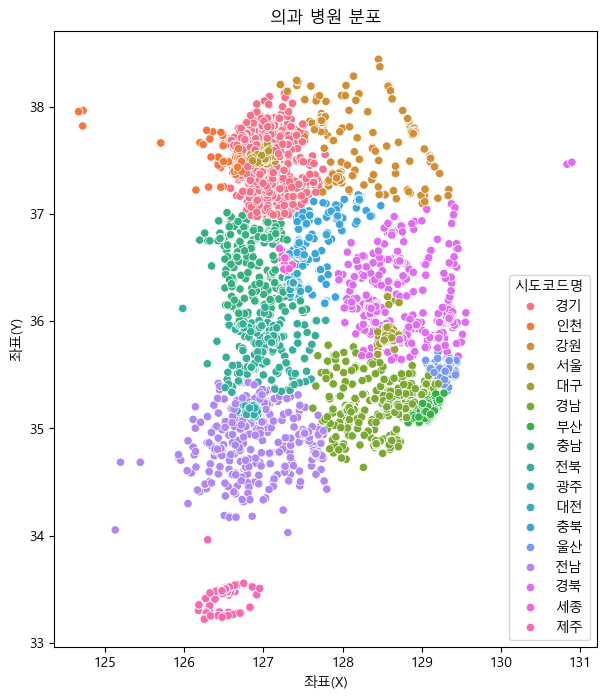

In [ ]:
plt.figure(figsize=(7,8))
sns.scatterplot(data=df_general, x='Ï¢åÌëú(X)', y='Ï¢åÌëú(Y)', hue='ÏãúÎèÑÏΩîÎìúÎ™Ö')
plt.title('ÏùòÍ≥º Î≥ëÏõê Î∂ÑÌè¨')

Text(0.5, 1.0, 'ÌïúÎ∞© Î≥ëÏõê Î∂ÑÌè¨')

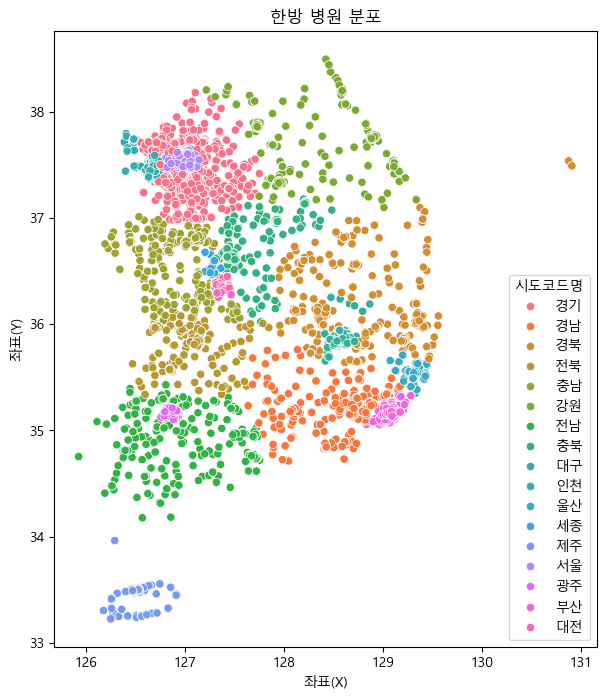

In [ ]:
plt.figure(figsize=(7,8))
sns.scatterplot(data=df_oriental, x='Ï¢åÌëú(X)', y='Ï¢åÌëú(Y)', hue='ÏãúÎèÑÏΩîÎìúÎ™Ö')
plt.title('ÌïúÎ∞© Î≥ëÏõê Î∂ÑÌè¨')

#### 2-1-3. Îç∞Ïù¥ÌÑ∞ ÌôïÏù∏ 

In [372]:
#df_final ÎßåÎì† Î≤ÑÏ†Ñ
df_final = pd.read_csv("data/Î≥ëÏõê1_Î≥¥ÏôÑ.csv",encoding='utf-8')
df_final.head()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏  \
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í≤ΩÍ∏∞  ÏàòÏõêÌåîÎã¨Íµ¨   ÏßÄÎèô  16247   
1   Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµêÏù∏Ï≤úÏÑ±Î™®Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Ïù∏Ï≤ú  Ïù∏Ï≤úÎ∂ÄÌèâÍµ¨  Î∂ÄÌèâÎèô  21431   
2         Í∞ïÎ¶âÏïÑÏÇ∞Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í∞ïÏõê    Í∞ïÎ¶âÏãú  ÏÇ¨Ï≤úÎ©¥  25440   
3         Í∞ïÎ∂ÅÏÇºÏÑ±Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Ï¢ÖÎ°úÍµ¨   ÌèâÎèô   3181   
4        Í±¥Íµ≠ÎåÄÌïôÍµêÎ≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    ÏÑúÏö∏    Í¥ëÏßÑÍµ¨  ÌôîÏñëÎèô   5030   

                              Ï£ºÏÜå  Ï¥ùÏùòÏÇ¨Ïàò  ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  \
0      Í≤ΩÍ∏∞ÎèÑ ÏàòÏõêÏãú ÌåîÎã¨Íµ¨ Ï§ëÎ∂ÄÎåÄÎ°ú 93, (ÏßÄÎèô)   251          0         0           6   
1        Ïù∏Ï≤úÍ¥ëÏó≠Ïãú Î∂ÄÌèâÍµ¨ ÎèôÏàòÎ°ú 56, (Î∂ÄÌèâÎèô)   248          3         0           3   
2  Í∞ïÏõêÌäπÎ≥ÑÏûêÏπòÎèÑ Í∞ïÎ¶âÏãú ÏÇ¨Ï≤úÎ©¥ Î∞©ÎèôÍ∏∏ 38, (ÏÇ¨Ï≤úÎ©¥)   176          8         0          12   
3        ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÏÉàÎ¨∏ÏïàÎ°ú 29, (ÌèâÎèô)   278          0         1          11   
4     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í¥ëÏßÑÍµ¨ Îä•ÎèôÎ°ú 120-1, (ÌôîÏñëÎèô)   251          1         0          15   

   ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò       Ï¢åÌëú(X)  \
0        238          0         0           0          0  127.027427   
1        238          0         0           0          0  126.724899   
2        154          0         0           0          0  128.857841   
3        258          0         0           0          0  126.967750   
4        233          0         0           0          0  127.071828   

       Ï¢åÌëú(Y)  
0  37.277985  
1  37.484831  
2  37.818433  
3  37.568408  
4  37.540376

Text(0.5, 1.0, 'Ï†ÑÏ≤¥ Î≥ëÏõê Î∂ÑÌè¨')

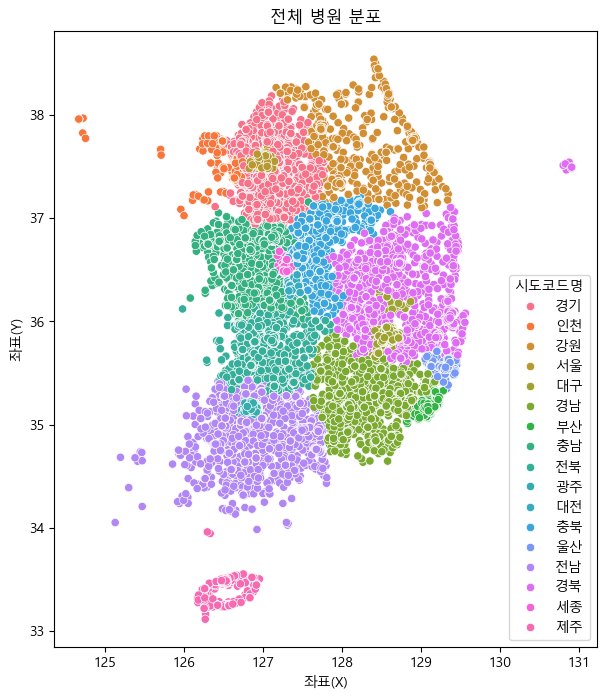

In [371]:
plt.figure(figsize=(7,8))
sns.scatterplot(data=df_final, x='Ï¢åÌëú(X)', y='Ï¢åÌëú(Y)', hue='ÏãúÎèÑÏΩîÎìúÎ™Ö')
plt.title('Ï†ÑÏ≤¥ Î≥ëÏõê Î∂ÑÌè¨')

### 2-2. ÏÉùÌôúÍ∂åÏó≠Î≥Ñ Î≥ëÏõê Î∂ÑÏÑù   

ÏÉùÌôúÍ∂å Îç∞Ïù¥ÌÑ∞Î•º Î∂àÎü¨ÏôÄ ÏÉùÌôúÍ∂åÏóêÏÑú Î≥ëÏõêÏù¥ Ïñ¥ÎñªÍ≤å Î∂ÑÌè¨ÌïòÎäîÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.   
Ïñ¥Îñ§ ÏÉùÌôúÍ∂åÏóê Î≥ëÏõêÏù¥ Î∂ÄÏ°±ÌïúÏßÄ Ï†àÎåÄÏ†ÅÏù∏ Í∏∞Ï§ÄÏπòÏù∏ ÏÉùÌôúÍ∂å Îã®ÏúÑÎ°ú ÌôïÏù∏Ìï©ÎãàÎã§.

In [373]:
df_living = pd.read_csv("data/ÏµúÏ¢ÖÏÉùÌôúÍ∂å.csv",encoding='utf-8')

In [374]:
df_living.head(1) #ÏÉùÌôúÍ∂åÏù¥ Ï¥ù 2127Í∞ú

ID                 ÏãúÎèÑ          ÏãúÍµ∞Íµ¨            ÏùçÎ©¥Îèô  \
0   1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú  Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨  Ï≤≠Ïö¥Ìö®ÏûêÎèô;ÏÇ¨ÏßÅÎèô;ÏÇºÏ≤≠Îèô   

                             ÌñâÏ†ïÍ∏∞Í¥ÄÏΩîÎìú   Ï¥ùÏù∏Íµ¨Ïàò   Ïñ¥Î¶∞Ïù¥    ÎÖ∏Ïù∏  
0  1111051500;1111053000;1111054000  22112  2808  4824

In [375]:
df_final.head(1)

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏                         Ï£ºÏÜå  \
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í≤ΩÍ∏∞  ÏàòÏõêÌåîÎã¨Íµ¨  ÏßÄÎèô  16247  Í≤ΩÍ∏∞ÎèÑ ÏàòÏõêÏãú ÌåîÎã¨Íµ¨ Ï§ëÎ∂ÄÎåÄÎ°ú 93, (ÏßÄÎèô)   

   Ï¥ùÏùòÏÇ¨Ïàò  ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò  ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò  \
0   251          0         0           6        238          0         0   

   ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò       Ï¢åÌëú(X)      Ï¢åÌëú(Y)  
0           0          0  127.027427  37.277985

#### 2-3-1. Î≥ëÏõê Î∞ÄÎèÑ Î∂ÑÏÑù (ÌèêÍ∏∞)
ÏãúÎèÑÎ≥ÑÎ°ú Î≥ëÏõê Î∞ÄÎèÑ Î∂ÑÏÑù ÏΩîÎìú

In [376]:
df_general['ÏãúÎèÑÏΩîÎìúÎ™Ö'].unique()

array(['Í≤ΩÍ∏∞', 'Ïù∏Ï≤ú', 'Í∞ïÏõê', 'ÏÑúÏö∏', 'ÎåÄÍµ¨', 'Í≤ΩÎÇ®', 'Î∂ÄÏÇ∞', 'Ï∂©ÎÇ®', 'Ï†ÑÎ∂Å', 'Í¥ëÏ£º', 'ÎåÄÏ†Ñ',
       'Ï∂©Î∂Å', 'Ïö∏ÏÇ∞', 'Ï†ÑÎÇ®', 'Í≤ΩÎ∂Å', 'ÏÑ∏Ï¢Ö', 'Ï†úÏ£º'], dtype=object)

In [ ]:
data_human = {
    'ÏãúÎèÑÎ™Ö': ['ÏÑúÏö∏', 'Î∂ÄÏÇ∞', 'ÎåÄÍµ¨', 'Ïù∏Ï≤ú', 'Í¥ëÏ£º', 'ÎåÄÏ†Ñ', 'Ïö∏ÏÇ∞', 'ÏÑ∏Ï¢Ö', 'Í≤ΩÍ∏∞',
             'Í∞ïÏõê', 'Ï∂©Î∂Å', 'Ï∂©ÎÇ®', 'Ï†ÑÎ∂Å', 'Ï†ÑÎÇ®', 'Í≤ΩÎ∂Å', 'Í≤ΩÎÇ®', 'Ï†úÏ£º'],
    'Ïù∏Íµ¨(Ï≤úÎ™Ö)': [15567, 4282, 2679, 2788, 2933, 2728, 1048, 818, 1342,
             91, 219, 265, 220, 144, 138, 312, 365],
    'Ïù∏Íµ¨Î∞ÄÎèÑ': [9400, 3284, 2360, 3009, 1463, 1474, 1106, 387, 13781,
                1525, 1627, 2204, 1768, 1768, 2611, 3267, 677]
} # ÏãúÎèÑÎ≥Ñ Ïù∏Íµ¨Ïàò Î∞è Ïù∏Íµ¨Î∞ÄÎèÑ Îç∞Ïù¥ÌÑ∞. 2023ÎÖÑ ÌôïÏ†ïÏù∏Íµ¨ Í∏∞Ï§Ä. 
df_human = pd.DataFrame(data_human).set_index('ÏãúÎèÑÎ™Ö')

In [ ]:
hospital_counts = df_final['ÏãúÎèÑÏΩîÎìúÎ™Ö'].value_counts()
df_human['Î≥ëÏõêÏàò'] = hospital_counts # ÏãúÎèÑÎ≥Ñ Î≥ëÏõê Ïàò Îç∞Ïù¥ÌÑ∞ Ï∂îÍ∞Ä
df_human['Î≥ëÏõêÏàò'] = df_human['Î≥ëÏõêÏàò'].fillna(0) # Î≥ëÏõê ÏàòÍ∞Ä ÏóÜÎäî ÏãúÎèÑÎäî 0ÏúºÎ°ú Ï±ÑÏõÄ

In [ ]:
df_human['Î≥ëÏõêÎ∞ÄÎèÑ(Í∞ú/1ÎßåÎ™Ö)'] = (df_human['Î≥ëÏõêÏàò'] / (df_human['Ïù∏Íµ¨(Ï≤úÎ™Ö)'] * 1000)) * 10000
df_human = df_human.sort_values('Î≥ëÏõêÎ∞ÄÎèÑ(Í∞ú/1ÎßåÎ™Ö)')

In [ ]:
df_human

Ïù∏Íµ¨(Ï≤úÎ™Ö)   Ïù∏Íµ¨Î∞ÄÎèÑ    Î≥ëÏõêÏàò  Î≥ëÏõêÎ∞ÄÎèÑ(Í∞ú/1ÎßåÎ™Ö)
ÏãúÎèÑÎ™Ö                                   
ÏÑ∏Ï¢Ö      818    387    464     5.672372
Í¥ëÏ£º     2933   1463   2326     7.930447
ÎåÄÏ†Ñ     2728   1474   2355     8.632698
ÏÑúÏö∏    15567   9400  19277    12.383247
Î∂ÄÏÇ∞     4282   3284   5585    13.042971
Ïö∏ÏÇ∞     1048   1106   1429    13.635496
Ïù∏Ï≤ú     2788   3009   3818    13.694405
ÎåÄÍµ¨     2679   2360   4171    15.569242
Ï†úÏ£º      365    677   1043    28.575342
Ï∂©Î∂Å      219   1627   2204   100.639269
Ï∂©ÎÇ®      265   2204   2862   108.000000
Í≤ΩÍ∏∞     1342  13781  17756   132.309985
Ï†ÑÎ∂Å      220   1768   2945   133.863636
Í≤ΩÎÇ®      312   3267   4231   135.608974
Ï†ÑÎÇ®      144   1768   2632   182.777778
Í∞ïÏõê       91   1525   1977   217.252747
Í≤ΩÎ∂Å      138   2611   3407   246.884058

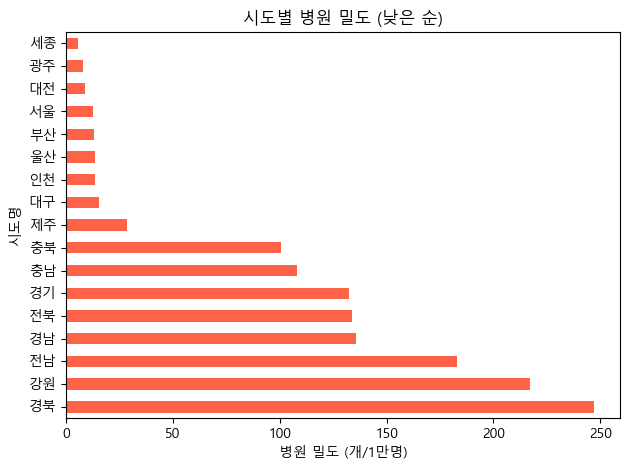

In [ ]:
df_human['Î≥ëÏõêÎ∞ÄÎèÑ(Í∞ú/1ÎßåÎ™Ö)'].plot(kind='barh', color='tomato') #ÌÜ†ÎßàÌÜ†
plt.xlabel('Î≥ëÏõê Î∞ÄÎèÑ (Í∞ú/1ÎßåÎ™Ö)')
plt.title('ÏãúÎèÑÎ≥Ñ Î≥ëÏõê Î∞ÄÎèÑ (ÎÇÆÏùÄ Ïàú)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
df_human2 = pd.DataFrame(data_human).set_index('ÏãúÎèÑÎ™Ö')

general_counts = df_general['ÏãúÎèÑÏΩîÎìúÎ™Ö'].value_counts()
oriental_counts = df_oriental['ÏãúÎèÑÏΩîÎìúÎ™Ö'].value_counts()

df_human2['ÏùºÎ∞òÎ≥ëÏõêÏàò'] = general_counts
df_human2['ÌïúÎ∞©Î≥ëÏõêÏàò'] = oriental_counts
df_human2 = df_human2.fillna(0)


df_human2['ÏùºÎ∞òÎ≥ëÏõê Î∞ÄÎèÑ'] = (df_human2['ÏùºÎ∞òÎ≥ëÏõêÏàò'] / (df_human2['Ïù∏Íµ¨(Ï≤úÎ™Ö)'] * 1000)) * 10000
df_human2['ÌïúÎ∞©Î≥ëÏõê Î∞ÄÎèÑ'] = (df_human2['ÌïúÎ∞©Î≥ëÏõêÏàò'] / (df_human2['Ïù∏Íµ¨(Ï≤úÎ™Ö)'] * 1000)) * 10000

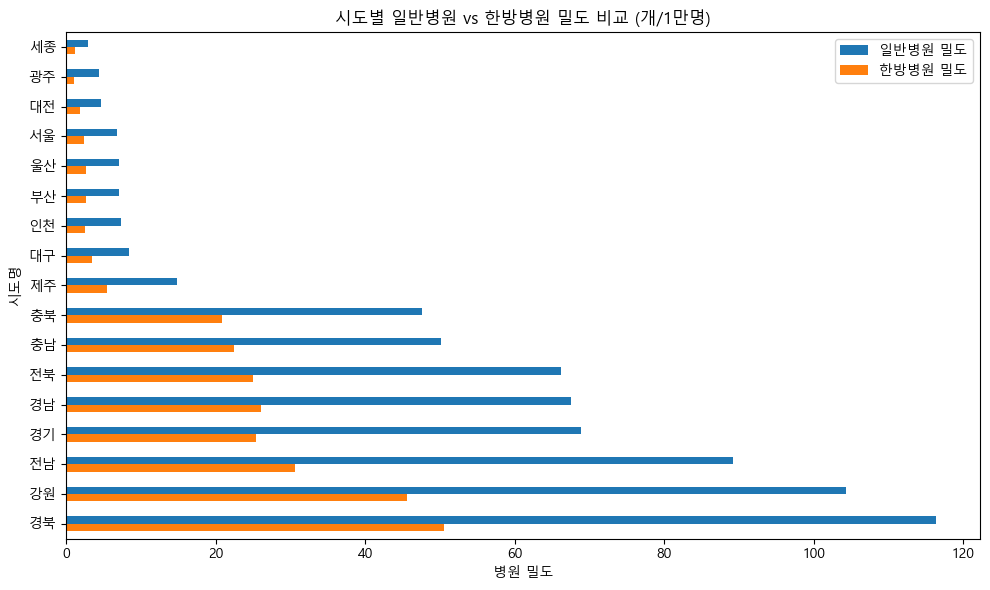

In [ ]:
df_human2[['ÏùºÎ∞òÎ≥ëÏõê Î∞ÄÎèÑ', 'ÌïúÎ∞©Î≥ëÏõê Î∞ÄÎèÑ']].sort_values('ÏùºÎ∞òÎ≥ëÏõê Î∞ÄÎèÑ').plot(kind='barh', figsize=(10,6))
plt.title('ÏãúÎèÑÎ≥Ñ ÏùºÎ∞òÎ≥ëÏõê vs ÌïúÎ∞©Î≥ëÏõê Î∞ÄÎèÑ ÎπÑÍµê (Í∞ú/1ÎßåÎ™Ö)')
plt.xlabel('Î≥ëÏõê Î∞ÄÎèÑ')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### 2-3-2. ÏÉùÌôúÍ∂å Î≥Ñ Î≥ëÏõê Î∞ÄÎèÑ   
df_final : ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö, ÏúÑÏπò(ÏùçÎ©¥Îèô,Ïö∞Ìé∏Î≤àÌò∏,Ï£ºÏÜå,Ï¢åÌëú), Ï¥ùÏùòÏÇ¨Ïàò, Ïô∏Í≥º&ÌïúÎ∞© ÏùòÏÇ¨Ïàò   
df_living : ID, ÏúÑÏπò(ÏãúÎèÑ,ÏãúÍµ∞Íµ¨,ÏùçÎ©¥Îèô),ÌñâÏ†ïÏΩîÎìú, Ï¥ùÏù∏Íµ¨Ïàò, ÏïÑÎèô&ÎÖ∏Ïù∏ Ïù∏Íµ¨Ïàò

In [377]:
# 1. Í≥†Ïú†Ìïú ÏùçÎ©¥Îèô Ïù¥Î¶Ñ Ï∂îÏ∂ú
final_eupmyeondong_set = set(df_final['ÏùçÎ©¥Îèô'].unique())

# 2. ÏÉùÌôúÍ∂å Îç∞Ïù¥ÌÑ∞Ïùò ÏùçÎ©¥ÎèôÏùÑ Î∂ÑÎ¶¨ Î∞è Ï†ïÏ†ú
living_eupmyeondong_series = df_living['ÏùçÎ©¥Îèô'].str.split(';').explode().str.strip()
living_eupmyeondong_set = set(living_eupmyeondong_series.unique())

# 3. Ïù¥Î¶Ñ Î∂àÏùºÏπò ÌôïÏù∏
only_in_final = final_eupmyeondong_set - living_eupmyeondong_set
only_in_living = living_eupmyeondong_set - final_eupmyeondong_set

# 4. ÏùºÎ∂Ä Í≤∞Í≥ºÏôÄ Ï¥ù Í∞úÏàò ÌôïÏù∏
print("Î≥ëÏõêÏóêÎäî ÏûàÏßÄÎßå ÏÉùÌôúÍ∂åÏóêÎäî ÏóÜÎäî ÏùçÎ©¥Îèô:", sorted(list(only_in_final)))
print("ÏÉùÌôúÍ∂åÏóêÎäî ÏûàÏßÄÎßå Î≥ëÏõêÏóêÎäî ÏóÜÎäî ÏùçÎ©¥Îèô:", sorted(list(only_in_living)))
print("Î≥ëÏõêÎßå ÏûàÎäî ÏùçÎ©¥Îèô Ïàò:", len(only_in_final))
print("ÏÉùÌôúÍ∂åÎßå ÏûàÎäî ÏùçÎ©¥Îèô Ïàò:", len(only_in_living))


Î≥ëÏõêÏóêÎäî ÏûàÏßÄÎßå ÏÉùÌôúÍ∂åÏóêÎäî ÏóÜÎäî ÏùçÎ©¥Îèô: ['Í∞ÄÎûåÎèô', 'Í∞ÄÏàòÎèô', 'Í∞ÄÏïºÎèô', 'Í∞ÄÏñëÎèô', 'Í∞ÄÏò§Îèô', 'Í∞ÄÏùåÎèô', 'Í∞ÄÏ†ïÎèô', 'Í∞ÄÌòÑÎèô', 'Í∞ÄÌù•Îèô', 'Í∞ÅÏÇ∞Îèô', 'Í∞ÅÌôîÎèô', 'Í∞ÑÏÑùÎèô', 'Í∞àÍ≥∂Îèô', 'Í∞àÎßàÎèô', 'Í∞àÏõîÎèô', 'Í∞êÎßåÎèô', 'Í∞êÏù¥Îèô', 'Í∞êÏ†ïÎèô', 'Í∞êÏ≤úÎèô', 'Í∞ëÏ†úÎèô', 'Í∞ïÎèô', 'Í∞ïÎ¨∏Îèô', 'Í∞ïÏÇ∞Îèô', 'Í∞ïÏ†ïÎèô', 'Í∞ïÏ†úÎèô', 'Í∞ïÌù•Îèô', 'Í∞úÍ∏àÎèô', 'Í∞úÎ¥âÎèô', 'Í∞úÏã†Îèô', 'Í∞úÌè¨Îèô', 'Í±∞Î™®Îèô', 'Í±∞Ïó¨Îèô', 'Í±∞Ï†úÎèô', 'Í±¥Í±¥Îèô', 'Í±∏Ìè¨Îèô', 'Í≤ÄÏÇ¨Îèô', 'Í≤ÄÏïîÎèô', 'Í≤¨ÏßÄÎèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÎçïÏñëÍµ¨ ÌôîÏ†ÑÎèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÎçïÏñëÍµ¨ Ìö®ÏûêÎèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÎèôÍµ¨ ÎßàÎëê1Îèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÎèôÍµ¨ ÎßàÎëê2Îèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÎèôÍµ¨ Î∞±ÏÑù1Îèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÎèôÍµ¨ Î∞±ÏÑù2Îèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÎèôÍµ¨ Ïû•Ìï≠2Îèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÎèôÍµ¨ Ï†ïÎ∞úÏÇ∞Îèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÎèôÍµ¨ Ï§ëÏÇ∞1Îèô', 'Í≤ΩÍ∏∞ÎèÑ Í≥†ÏñëÏãúÏùºÏÇ∞ÏÑúÍµ¨ ÎåÄÌôîÎèô'

**ÏßÄÍ∏à df_finalÏóê IDÎ•º Î∂ÄÏó¨Ìï®. Ï¢åÌëúÎ•º Ïù¥Ïö©Ìï¥ÏÑú Ïñ¥Îñ§ ÏÉùÌôúÍ∂åÏóê Ìè¨Ìï®ÎêòÎäîÏßÄ ÌåêÎã® ÌõÑ, IDÎ•º Î∂ÄÏó¨Ìï®. Ïù¥ÌõÑ df_livingÍ≥º Î≥ëÌï©Ìï† Îïå IDÍ∏∞Ï§ÄÏ§Ä **

In [386]:
if 'ID' in df_final.columns:
    df_final = df_final.drop(columns='ID')

# 1. Î≥ëÏõê dfÎ•º GeoDataFrameÏúºÎ°ú Î≥ÄÌôò
df_final['geometry'] = df_final.apply(lambda row: Point(row['Ï¢åÌëú(X)'], row['Ï¢åÌëú(Y)']), axis=1)
df_final = gpd.GeoDataFrame(df_final, geometry='geometry', crs="EPSG:4326")

# 2. ÏÉùÌôúÍ∂å GeoJSON Î∂àÎü¨Ïò§Í∏∞
gdf_living = gpd.read_file("data/onlyÏÉùÌôúÍ∂å.geojson")
gdf_living['ID'] = gdf_living['ID'].astype(int)

# 3. Í≥µÍ∞Ñ Ï°∞Ïù∏ (Î≥ëÏõêÏù¥ Ìè¨Ìï®Îêú ÏÉùÌôúÍ∂å IDÎ•º Îß§Ìïë)
df_final = gpd.sjoin(df_final, gdf_living[['ID', 'geometry']], how='left', predicate='within')

# 5. ÌïÑÏöîÏãú Ï†ÄÏû•
# df_final.to_file("Î≥ëÏõê_ÏÉùÌôúÍ∂å_Îß§ÌïëÍ≤∞Í≥º.geojson", driver="GeoJSON")

In [387]:
# 4. Í≤∞Í≥º ÌôïÏù∏
df_final.head(1)

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö Ï¢ÖÎ≥ÑÏΩîÎìúÎ™Ö ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö ÏùçÎ©¥Îèô   Ïö∞Ìé∏Î≤àÌò∏                         Ï£ºÏÜå  \
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê ÏÑ±ÎπàÏÑºÌä∏Î≥ëÏõê  ÏÉÅÍ∏âÏ¢ÖÌï©    Í≤ΩÍ∏∞  ÏàòÏõêÌåîÎã¨Íµ¨  ÏßÄÎèô  16247  Í≤ΩÍ∏∞ÎèÑ ÏàòÏõêÏãú ÌåîÎã¨Íµ¨ Ï§ëÎ∂ÄÎåÄÎ°ú 93, (ÏßÄÎèô)   

   Ï¥ùÏùòÏÇ¨Ïàò  ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò  ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò  ...  ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò       Ï¢åÌëú(X)      Ï¢åÌëú(Y)  \
0   251          0         0  ...          0  127.027427  37.277985   

                     geometry  ID_left  ID_right  ÏùòÍ≥º+ÌïúÎ∞©  Î≥ëÏõê_Ïàò index_right  \
0  POINT (127.02743 37.27799)    958.0     958.0    244     1       954.0   

      ID  
0  958.0  

[1 rows x 25 columns]

In [388]:
# 1. ÏùòÍ≥º+ÌïúÎ∞© ÏùòÏÇ¨ Ïàò Ìï©Í≥Ñ Ïª¨Îüº ÏÉùÏÑ±
df_final['ÏùòÍ≥º+ÌïúÎ∞©'] = (
    df_final[['ÏùòÍ≥ºÏùºÎ∞òÏùò Ïù∏ÏõêÏàò', 'ÏùòÍ≥ºÏ†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò', 'ÏùòÍ≥ºÎ†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò', 'ÏùòÍ≥ºÏù∏ÌÑ¥ Ïù∏ÏõêÏàò']].sum(axis=1) +
    df_final[['ÌïúÎ∞©ÏùºÎ∞òÏùò Ïù∏ÏõêÏàò', 'ÌïúÎ∞©Ï†ÑÎ¨∏Ïùò Ïù∏ÏõêÏàò', 'ÌïúÎ∞©Î†àÏßÄÎçòÌä∏ Ïù∏ÏõêÏàò', 'ÌïúÎ∞©Ïù∏ÌÑ¥ Ïù∏ÏõêÏàò']].sum(axis=1)
)

# 2. Î≥ëÏõê Ïàò Ï∂îÍ∞Ä
df_final['Î≥ëÏõê_Ïàò'] = 1

# 3. IDÍ∞Ä ÏûàÎäî Î≥ëÏõêÎßå ÌïÑÌÑ∞ÎßÅ
df_valid = df_final.dropna(subset=['ID']).copy()
df_valid['ID'] = df_valid['ID'].astype(int)

# 4. ID Í∏∞Ï§Ä Î≥ëÏõê Î∞è ÏùòÏÇ¨ Ïàò ÏßëÍ≥Ñ
df_summary = df_valid.groupby('ID', as_index=False).agg({
    'Î≥ëÏõê_Ïàò': 'sum',
    'ÏùòÍ≥º+ÌïúÎ∞©': 'sum'
}).rename(columns={'ÏùòÍ≥º+ÌïúÎ∞©': 'ÏùòÏÇ¨Ïàò', 'Î≥ëÏõê_Ïàò': 'Î≥ëÏõêÏàò'})

# 5. df_livingÏóêÏÑú Ïù∏Íµ¨ Ï†ïÎ≥¥ Ï∂îÏ∂ú
df_demo = df_living[['ID', 'ÏùçÎ©¥Îèô', 'Ï¥ùÏù∏Íµ¨Ïàò', 'Ïñ¥Î¶∞Ïù¥', 'ÎÖ∏Ïù∏']].copy()
df_demo['ID'] = df_demo['ID'].astype(int)

# 6. Î≥ëÏõê+ÏùòÏÇ¨ ÏàòÏôÄ Ïù∏Íµ¨ Ï†ïÎ≥¥ Î≥ëÌï©
df_result = df_demo.merge(df_summary, on='ID', how='left').fillna({'Î≥ëÏõêÏàò': 0, 'ÏùòÏÇ¨Ïàò': 0})

# Í≤∞Í≥º ÌôïÏù∏
df_result.head()


ID                          ÏùçÎ©¥Îèô   Ï¥ùÏù∏Íµ¨Ïàò   Ïñ¥Î¶∞Ïù¥    ÎÖ∏Ïù∏    Î≥ëÏõêÏàò     ÏùòÏÇ¨Ïàò
0   1                Ï≤≠Ïö¥Ìö®ÏûêÎèô;ÏÇ¨ÏßÅÎèô;ÏÇºÏ≤≠Îèô  22112  2808  4824   95.0   129.0
1   2                      Î∂ÄÏïîÎèô;ÌèâÏ∞ΩÎèô  26249  3568  5874   18.0    19.0
2   3                      Î¨¥ÏïÖÎèô;ÍµêÎÇ®Îèô  17341  2810  3318   27.0   391.0
3   4  Í∞ÄÌöåÎèô;Ï¢ÖÎ°ú1.2.3.4Í∞ÄÎèô;Ï¢ÖÎ°ú5.6Í∞ÄÎèô;Ïù¥ÌôîÎèô  22735  1624  5234  233.0  1230.0
4   5              ÌòúÌôîÎèô;Ï∞ΩÏã†Ï†ú1Îèô;Ï∞ΩÏã†Ï†ú2Îèô  27638  2394  6065   80.0    76.0

In [389]:
# 1. GeoJSON Î∂àÎü¨Ïò§Í∏∞
gdf = gpd.read_file("data/onlyÏÉùÌôúÍ∂å.geojson")
gdf["ID"] = gdf["ID"].astype(int)

# üîπ 3. ID Í∏∞Ï§ÄÏúºÎ°ú ÏÉùÌôúÍ∂å Îã®ÏúÑÎ°ú dissolve (ÌïòÎÇòÏùò Ìè¥Î¶¨Í≥§ÏúºÎ°ú Î¨∂Í∏∞)
gdf = gdf.dissolve(by="ID", as_index=False)

# 4. df_resultÏóê Ï∑®ÏïΩÍ≥ÑÏ∏µ Ïª¨Îüº Ï∂îÍ∞Ä
df_result["Ï∑®ÏïΩÍ≥ÑÏ∏µ"] = df_result["Ïñ¥Î¶∞Ïù¥"] + df_result["ÎÖ∏Ïù∏"]
df_result["ID"] = df_result["ID"].astype(int)

# 5. Î≥ëÌï©
gdf_merged = gdf.merge(df_result, on="ID", how="left")

# 6. _xÏôÄ _y Ï≤òÎ¶¨
for col in gdf_merged.columns:
    if col.endswith("_x") and col[:-2] + "_y" in gdf_merged.columns:
        base = col[:-2]
        gdf_merged[base] = gdf_merged[col].combine_first(gdf_merged[base + "_y"])
        gdf_merged = gdf_merged.drop(columns=[col, base + "_y"])

# 7. ÏãúÍ∞ÅÌôîÏö© Ïª¨Îüº Í≥ÑÏÇ∞
gdf_merged["ÏùòÎ£åÏûêÏõê"] = gdf_merged["Î≥ëÏõêÏàò"] + gdf_merged["ÏùòÏÇ¨Ïàò"]
colormap = cm.linear.YlOrRd_09.scale(
    gdf_merged["ÏùòÎ£åÏûêÏõê"].min(),
    gdf_merged["ÏùòÎ£åÏûêÏõê"].max()
)
colormap.caption = "ÏÉùÌôúÍ∂åÎ≥Ñ ÏùòÎ£åÏûêÏõê (Î≥ëÏõê Ïàò + ÏùòÏÇ¨ Ïàò)"

# 8. ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=[36.5, 127.8], zoom_start=7)

# 9. GeoJson ÏãúÍ∞ÅÌôî
folium.GeoJson(
    gdf_merged,
    name="ÏÉùÌôúÍ∂å ÏùòÎ£åÏûêÏõê",
    tooltip=folium.GeoJsonTooltip(
        fields=["ID", "ÏùçÎ©¥Îèô","Ï¥ùÏù∏Íµ¨Ïàò", "Ï∑®ÏïΩÍ≥ÑÏ∏µ", "Î≥ëÏõêÏàò", "ÏùòÏÇ¨Ïàò", "ÏùòÎ£åÏûêÏõê"],
        aliases=["ID", "ÏùçÎ©¥Îèô", "Ï¥ùÏù∏Íµ¨Ïàò", "Ï∑®ÏïΩÍ≥ÑÏ∏µ", "Î≥ëÏõêÏàò", "ÏùòÏÇ¨Ïàò", "ÏùòÎ£åÏûêÏõê"],
        localize=True
    ),
    style_function=lambda feature: {
        "fillColor": colormap(feature["properties"]["ÏùòÎ£åÏûêÏõê"]) if feature["properties"]["ÏùòÎ£åÏûêÏõê"] else "lightgray",
        "color": "black",
        "weight": 0.3,
        "fillOpacity": 0.7,
    },
).add_to(m)

colormap.add_to(m)

# 10. Ï†ÄÏû•
m.save("ÏÉùÌôúÍ∂å_ÏùòÎ£åÏûêÏõê.html")
gdf_merged.to_file("ÏÉùÌôúÍ∂å_ÏùòÎ£åÏûêÏõê.geojson", driver="GeoJSON")

C:\Users\zappe\AppData\Local\Temp\ipykernel_53760\900061308.py:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  gdf_merged[base] = gdf_merged[col].combine_first(gdf_merged[base + "_y"])
C:\Users\zappe\AppData\Local\Temp\ipykernel_53760\900061308.py:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  gdf_merged[base] = gdf_merged[col].combine_first(gdf_merged[base + "_y"])
C:\Users\zappe\AppData\Local\Temp\ipykernel_53760\900061308.py:19: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no 

##### Î∂ÑÏÑù Î™©Ìëú   
ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÏùòÎ£åÏÑúÎπÑÏä§ Ï†ëÍ∑ºÏÑ±Ïù¥ ÎÇÆÏùÄ ÏßÄÏó≠ÏùÑ ÏÉùÌôúÍ∂å Îã®ÏúÑÎ°ú ÎèÑÏ∂úÌïúÎã§. ÏùòÎ£åÏûêÏõê ÎåÄÎπÑ ÏàòÏöîÍ∞Ä ÎÜíÏùÄ ÏßÄÏó≠ = Í≥µÍ∏â Î∂ÄÏ°± ÏßÄÏó≠ÏúºÎ°ú ÌåêÎã®.   
Ïù∏Íµ¨ 1000Î™Ö Îãπ Î≥ëÏõê ÏàòÎ•º Í≥ÑÏÇ∞ÌïòÏó¨ ÏùòÎ£åÏûêÏõê Î∞ÄÎèÑÎ•º ÌèâÍ∞ÄÌïú ÌõÑ, Ï∑®ÏïΩÍ≥ÑÏ∏µ ÎπÑÏú®ÏùÑ Í≥†Î†§ÌïúÎã§. ÏùòÎ£åÏûêÏõê ÏßÄÏàòÎèÑ Îã®Ïàú Î≥ëÏõêÏàò+ÏùòÏÇ¨ÏàòÍ∞Ä ÏïÑÎãå Ï†ïÍ∑úÌôî ÌõÑ ÌèâÍ∑†ÏùÑ ÎÇº ÏòàÏ†ïÏù¥Îã§.

In [390]:
gdf_merged['Ïù∏Íµ¨1Ï≤úÎ™ÖÎãπ_Î≥ëÏõêÏàò'] = gdf_merged['Î≥ëÏõêÏàò'] / (gdf_merged['Ï¥ùÏù∏Íµ¨Ïàò'] / 1000)
gdf_merged['Ïù∏Íµ¨1Ï≤úÎ™ÖÎãπ_ÏùòÏÇ¨Ïàò'] = gdf_merged['ÏùòÏÇ¨Ïàò'] / (gdf_merged['Ï¥ùÏù∏Íµ¨Ïàò'] / 1000)

gdf_merged['Ï∑®ÏïΩÍ≥ÑÏ∏µÎπÑÏú®'] = (gdf_merged['Ïñ¥Î¶∞Ïù¥'] + gdf_merged['ÎÖ∏Ïù∏']) / gdf_merged['Ï¥ùÏù∏Íµ¨Ïàò']

In [391]:
scaler = MinMaxScaler()
gdf_merged[['Î≥ëÏõêÏàò_norm', 'ÏùòÏÇ¨Ïàò_norm']] = scaler.fit_transform(gdf_merged[['Î≥ëÏõêÏàò', 'ÏùòÏÇ¨Ïàò']])
gdf_merged['ÏùòÎ£åÏûêÏõêÏßÄÏàò'] = (gdf_merged['Î≥ëÏõêÏàò_norm'] + gdf_merged['ÏùòÏÇ¨Ïàò_norm']) / 2


In [392]:
threshold_medical = gdf_merged['ÏùòÎ£åÏûêÏõêÏßÄÏàò'].quantile(0.2)
threshold_vulnerable = gdf_merged['Ï∑®ÏïΩÍ≥ÑÏ∏µÎπÑÏú®'].quantile(0.8)
threshold_doctor_density = gdf_merged['Ïù∏Íµ¨1Ï≤úÎ™ÖÎãπ_ÏùòÏÇ¨Ïàò'].quantile(0.2)

gdf_merged['Ï∑®ÏïΩÏÉùÌôúÍ∂å'] = (
    (gdf_merged['ÏùòÎ£åÏûêÏõêÏßÄÏàò'] <= threshold_medical) &
    (gdf_merged['Ï∑®ÏïΩÍ≥ÑÏ∏µÎπÑÏú®'] >= threshold_vulnerable) &
    (gdf_merged['Ïù∏Íµ¨1Ï≤úÎ™ÖÎãπ_ÏùòÏÇ¨Ïàò'] <= threshold_doctor_density)
)

In [394]:
# ÏÉâÏÉÅ: Ï∑®ÏïΩ Ïó¨Î∂Ä
folium.GeoJson(
    gdf_merged,
    style_function=lambda feature: {
        'fillColor': 'red' if feature['properties']['Ï∑®ÏïΩÏÉùÌôúÍ∂å'] else 'green',
        'color': 'black',
        'weight': 0.3,
        'fillOpacity': 0.5
    },
    tooltip=folium.GeoJsonTooltip(
        fields=['ID', 'Ï¥ùÏù∏Íµ¨Ïàò', 'ÏùòÎ£åÏûêÏõêÏßÄÏàò', 'Ï∑®ÏïΩÍ≥ÑÏ∏µÎπÑÏú®', 'Ïù∏Íµ¨1Ï≤úÎ™ÖÎãπ_ÏùòÏÇ¨Ïàò', 'Ï∑®ÏïΩÏÉùÌôúÍ∂å'],
        aliases=['ID', 'Ïù∏Íµ¨Ïàò', 'ÏùòÎ£åÏßÄÏàò', 'Ï∑®ÏïΩÍ≥ÑÏ∏µÎπÑÏú®', 'ÏùòÏÇ¨Î∞ÄÎèÑ', 'Ï∑®ÏïΩÏó¨Î∂Ä']
    )
).add_to(m)
m.save("Î≥ëÏõê1_Ï∑®ÏïΩÏÉùÌôúÍ∂å_ÏßÄÎèÑ.html")


In [395]:
gdf_merged.to_csv("Î≥ëÏõê1_Ï∑®ÏïΩÏÉùÌôúÍ∂å_Í≤∞Í≥º.csv", index=False, encoding='utf-8-sig')

###  KMeans ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ(ÌèêÍ∏∞)
Î≥ëÏõê ÏúÑÏπò Í∏∞Î∞òÏúºÎ°ú ÏßÄÎ¶¨Ï†Å Î∞ÄÏ†ëÎèÑ Í≥ÑÏÇ∞.
Î∞ÄÏßë ÏßÄÏó≠, Ï§ëÍ∞Ñ Î∞ÄÎèÑ, Ïô∏Í≥Ω ÌÅ¥Îü¨Ïä§ÌÑ∞, ÏÑ¨(Îã®Ï†àÎê®) ÌÅ¥Îü¨Ïä§ÌÑ∞, ÌäπÏù¥ ÏúÑÏπò ÌÅ¥Îü¨Ïä§ÌÑ∞ Îì±ÏùÑ Ïïå Ïàò ÏûàÏùå

In [ ]:
coords_all = df_final[['Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)']].dropna()   
coords_general = df_general[['Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)']].dropna()
coords_oriental = df_oriental[['Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)']].dropna()

In [ ]:
kmeans_all = KMeans(n_clusters=20, random_state=42)
kmeans_general = KMeans(n_clusters=20, random_state=42)
kmeans_oriental = KMeans(n_clusters=20, random_state=42)
coords_all['cluster'] = kmeans_all.fit_predict(coords_all)
coords_general['cluster'] = kmeans_general.fit_predict(coords_general)
coords_oriental['cluster'] = kmeans_oriental.fit_predict(coords_oriental)

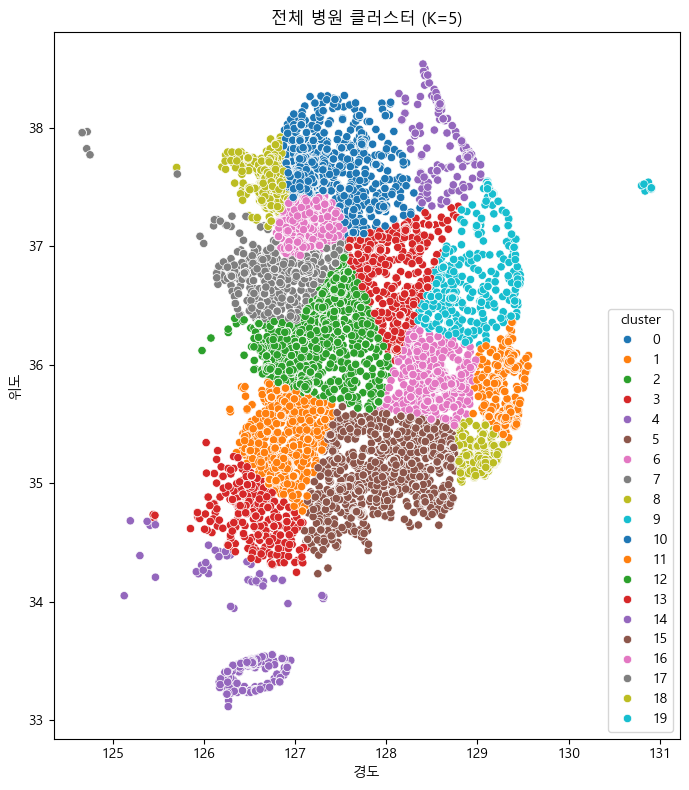

In [ ]:
plt.figure(figsize=(7, 8))
sns.scatterplot(data=coords_all, x='Ï¢åÌëú(X)', y='Ï¢åÌëú(Y)', hue='cluster', palette='tab10')
plt.title('Ï†ÑÏ≤¥ Î≥ëÏõê ÌÅ¥Îü¨Ïä§ÌÑ∞ (K=5)')


plt.xlabel('Í≤ΩÎèÑ')
plt.ylabel('ÏúÑÎèÑ')
plt.tight_layout()
plt.show()

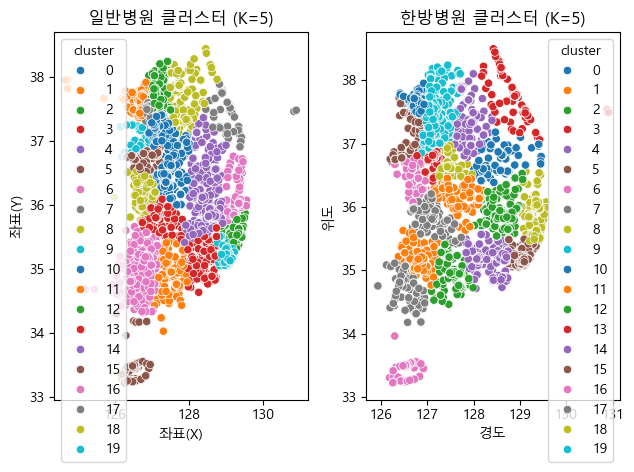

In [ ]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=coords_general, x='Ï¢åÌëú(X)', y='Ï¢åÌëú(Y)', hue='cluster', palette='tab10')
plt.title('ÏùºÎ∞òÎ≥ëÏõê ÌÅ¥Îü¨Ïä§ÌÑ∞ (K=5)')

plt.subplot(1, 2, 2)
sns.scatterplot(data=coords_oriental, x='Ï¢åÌëú(X)', y='Ï¢åÌëú(Y)', hue='cluster', palette='tab10')
plt.title('ÌïúÎ∞©Î≥ëÏõê ÌÅ¥Îü¨Ïä§ÌÑ∞ (K=5)')

plt.xlabel('Í≤ΩÎèÑ')
plt.ylabel('ÏúÑÎèÑ')
plt.tight_layout()
plt.show()

In [ ]:
coords_all['cluster'].value_counts().sort_index()

cluster
0     19171
1      2412
2      4684
3       927
4      1096
5      2723
6      5584
7       456
8      6641
9       298
10     1486
11     3517
12     2649
13     1121
14      578
15     1476
16     8064
17     1713
18    13268
19      595
Name: count, dtype: int64

In [ ]:
coords_all.groupby('cluster')[['Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)']].mean()

Ï¢åÌëú(X)      Ï¢åÌëú(Y)
cluster                       
0        127.052837  37.566011
1        129.321977  35.725137
2        127.419287  36.422048
3        126.515131  34.748278
4        126.504188  33.473750
5        128.462161  35.165249
6        128.574835  35.879802
7        126.480762  36.866666
8        129.046708  35.186242
9        129.207029  37.278832
10       127.786545  37.555744
11       126.873556  35.239543
12       126.997153  35.949061
13       128.091190  36.789147
14       128.702270  37.889856
15       127.588717  34.961614
16       127.068398  37.266191
17       127.043171  36.767054
18       126.786346  37.515702
19       128.770381  36.595210

In [ ]:
for c in sorted(coords_all['cluster'].unique()):
    idx = coords_all[coords_all['cluster'] == c].index
    top_sido = df_final.loc[idx, 'ÏãúÎèÑÏΩîÎìúÎ™Ö'].value_counts().head(5)
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {c} Ï£ºÏöî ÏßÄÏó≠:", top_sido.to_dict())
    


ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 Ï£ºÏöî ÏßÄÏó≠: {'ÏÑúÏö∏': 15296, 'Í≤ΩÍ∏∞': 3837, 'Í∞ïÏõê': 38}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Ï£ºÏöî ÏßÄÏó≠: {'Ïö∏ÏÇ∞': 1422, 'Í≤ΩÎ∂Å': 989, 'Í≤ΩÎÇ®': 1}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 Ï£ºÏöî ÏßÄÏó≠: {'ÎåÄÏ†Ñ': 2355, 'Ï∂©Î∂Å': 1442, 'ÏÑ∏Ï¢Ö': 449, 'Ï∂©ÎÇ®': 301, 'Í≤ΩÎÇ®': 82}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 Ï£ºÏöî ÏßÄÏó≠: {'Ï†ÑÎÇ®': 927}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 Ï£ºÏöî ÏßÄÏó≠: {'Ï†úÏ£º': 1043, 'Ï†ÑÎÇ®': 53}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 5 Ï£ºÏöî ÏßÄÏó≠: {'Í≤ΩÎÇ®': 2723}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 6 Ï£ºÏöî ÏßÄÏó≠: {'ÎåÄÍµ¨': 4168, 'Í≤ΩÎ∂Å': 1289, 'Í≤ΩÎÇ®': 127}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 7 Ï£ºÏöî ÏßÄÏó≠: {'Ï∂©ÎÇ®': 430, 'Ïù∏Ï≤ú': 19, 'Í≤ΩÍ∏∞': 7}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 8 Ï£ºÏöî ÏßÄÏó≠: {'Î∂ÄÏÇ∞': 5585, 'Í≤ΩÎÇ®': 1049, 'Ïö∏ÏÇ∞': 7}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 9 Ï£ºÏöî ÏßÄÏó≠: {'Í∞ïÏõê': 220, 'Í≤ΩÎ∂Å': 78}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 10 Ï£ºÏöî ÏßÄÏó≠: {'Í∞ïÏõê': 1102, 'Í≤ΩÍ∏∞': 368, 'Ï∂©Î∂Å': 16}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 11 Ï£ºÏöî ÏßÄÏó≠: {'Í¥ëÏ£º': 2325, 'Ï†ÑÎ∂Å': 641, 'Ï†ÑÎÇ®': 551}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 12 Ï£ºÏöî ÏßÄÏó≠: {'Ï†ÑÎ∂Å': 2121, 'Ï∂©ÎÇ®': 516, 'Í≤ΩÎÇ®': 12}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 13 Ï£ºÏöî ÏßÄÏó≠: {'Ï∂©Î∂Å': 638, 'Í≤ΩÎ∂Å': 446, 'Í∞ïÏ

In [ ]:
print('[ÏùºÎ∞òÎ≥ëÏõê]')
for c in sorted(coords_general['cluster'].unique()):
    idx = coords_general[coords_general['cluster'] == c].index
    top_sido = df_final.loc[idx, 'ÏãúÎèÑÏΩîÎìúÎ™Ö'].value_counts().head(5)
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {c} Ï£ºÏöî ÏßÄÏó≠:", top_sido.to_dict())

[ÏùºÎ∞òÎ≥ëÏõê]
ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 Ï£ºÏöî ÏßÄÏó≠: {'ÎåÄÏ†Ñ': 1264, 'Ï∂©Î∂Å': 930, 'ÏÑ∏Ï¢Ö': 239, 'Ï∂©ÎÇ®': 142, 'Ï†ÑÎ∂Å': 10}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Ï£ºÏöî ÏßÄÏó≠: {'Ï†ÑÎÇ®': 540, 'Ï†ÑÎ∂Å': 64, 'Í≤ΩÎÇ®': 53}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 Ï£ºÏöî ÏßÄÏó≠: {'ÏÑúÏö∏': 6760, 'Í≤ΩÍ∏∞': 2072, 'Í∞ïÏõê': 17}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 Ï£ºÏöî ÏßÄÏó≠: {'Í≤ΩÎÇ®': 1402, 'Í≤ΩÎ∂Å': 12}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 Ï£ºÏöî ÏßÄÏó≠: {'ÎåÄÍµ¨': 2261, 'Í≤ΩÎ∂Å': 638, 'Í≤ΩÎÇ®': 76}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 5 Ï£ºÏöî ÏßÄÏó≠: {'Ï†úÏ£º': 541, 'Ï†ÑÎÇ®': 11}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 6 Ï£ºÏöî ÏßÄÏó≠: {'Í¥ëÏ£º': 1310, 'Ï†ÑÎÇ®': 733, 'Ï†ÑÎ∂Å': 145}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 7 Ï£ºÏöî ÏßÄÏó≠: {'Í∞ïÏõê': 268, 'Í≤ΩÎ∂Å': 18}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 8 Ï£ºÏöî ÏßÄÏó≠: {'Ï∂©ÎÇ®': 242, 'Ï†ÑÎ∂Å': 213}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 9 Ï£ºÏöî ÏßÄÏó≠: {'Ï∂©ÎÇ®': 108, 'Í≤ΩÍ∏∞': 98, 'Ïù∏Ï≤ú': 4}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 10 Ï£ºÏöî ÏßÄÏó≠: {'Í≤ΩÍ∏∞': 3350, 'Ï∂©ÎÇ®': 10, 'Ï∂©Î∂Å': 7}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 11 Ï£ºÏöî ÏßÄÏó≠: {'Ïù∏Ï≤ú': 2045, 'Í≤ΩÍ∏∞': 1855, 'ÏÑúÏö∏': 93}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 12 Ï£ºÏöî ÏßÄÏó≠: {'Ïö∏ÏÇ∞': 742, 'Í≤ΩÎÇ®': 31, 'Í≤ΩÎ∂Å': 21, 'Î∂ÄÏÇ∞': 4}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 13 Ï£º

In [ ]:
print('[ÌïúÎ∞©Î≥ëÏõê]')
for c in sorted(coords_oriental['cluster'].unique()):
    idx = coords_oriental[coords_oriental['cluster'] == c].index
    top_sido = df_final.loc[idx, 'ÏãúÎèÑÏΩîÎìúÎ™Ö'].value_counts().head(5)
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {c} Ï£ºÏöî ÏßÄÏó≠:", top_sido.to_dict())

[ÌïúÎ∞©Î≥ëÏõê]
ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 Ï£ºÏöî ÏßÄÏó≠: {'ÏÑúÏö∏': 1341, 'Í≤ΩÍ∏∞': 888, 'Ïù∏Ï≤ú': 198}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1 Ï£ºÏöî ÏßÄÏó≠: {'Í¥ëÏ£º': 329, 'Ï†ÑÎÇ®': 101, 'Ï†ÑÎ∂Å': 29}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 Ï£ºÏöî ÏßÄÏó≠: {'ÎåÄÍµ¨': 910, 'Í≤ΩÎ∂Å': 273, 'Í≤ΩÎÇ®': 22}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 3 Ï£ºÏöî ÏßÄÏó≠: {'Ï∂©ÎÇ®': 264, 'ÏÑ∏Ï¢Ö': 2}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 4 Ï£ºÏöî ÏßÄÏó≠: {'Í∞ïÏõê': 219, 'Ï∂©Î∂Å': 123, 'Í≤ΩÍ∏∞': 34}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 5 Ï£ºÏöî ÏßÄÏó≠: {'Î∂ÄÏÇ∞': 1152, 'Í≤ΩÎÇ®': 209, 'Ïö∏ÏÇ∞': 7}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 6 Ï£ºÏöî ÏßÄÏó≠: {'Ï†úÏ£º': 199}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 7 Ï£ºÏöî ÏßÄÏó≠: {'Ï†ÑÎ∂Å': 490, 'Ï∂©ÎÇ®': 46, 'Í≤ΩÎÇ®': 9}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 8 Ï£ºÏöî ÏßÄÏó≠: {'Ïö∏ÏÇ∞': 268, 'Í≤ΩÎ∂Å': 217}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 9 Ï£ºÏöî ÏßÄÏó≠: {'Í≤ΩÍ∏∞': 1520, 'Ï∂©ÎÇ®': 16, 'Ï∂©Î∂Å': 5}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 10 Ï£ºÏöî ÏßÄÏó≠: {'Í≤ΩÎ∂Å': 169, 'Ï∂©Î∂Å': 10, 'Í∞ïÏõê': 4}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 11 Ï£ºÏöî ÏßÄÏó≠: {'ÎåÄÏ†Ñ': 506, 'Ï∂©ÎÇ®': 53, 'Ï∂©Î∂Å': 38, 'Í≤ΩÎ∂Å': 32, 'Í≤ΩÎÇ®': 15}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 12 Ï£ºÏöî ÏßÄÏó≠: {'Ï†ÑÎÇ®': 190, 'Í≤ΩÎÇ®': 18, 'Ï†ÑÎ∂Å': 16}
ÌÅ¥Îü¨Ïä§ÌÑ∞ 13 Ï£ºÏöî ÏßÄÏó≠: {'Í∞ïÏõê': 1

## 3. ÏßÑÎ£åÍ≥ºÎ™© Ï†ïÎ≥¥ Îç∞Ïù¥ÌÑ∞ Î∂ÑÏÑù

### 3-1. Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨   

Îç∞Ïù¥ÌÑ∞ : csvÎ°ú Î≥ÄÌôòÌïú ÏóëÏÖÄÌååÏùº. Îç∞Ïù¥ÌÑ∞Ïùò Íµ¨Ï°∞Î•º ÏÇ¥Ìé¥Î≥¥Í≥† Ï†ÑÏ≤òÎ¶¨ ÏûëÏóÖÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.   
Îã´ÏïÑÎÜìÏùÑÍ±∞ÏûÑ

In [396]:
df_detail = pd.read_csv(r"data/Î≥ëÏõê2.csv",encoding='utf-8')

In [397]:
df_detail.head()

ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏           ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö  ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú  \
0  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê Ïó¨ÏùòÎèÑÏÑ±Î™®Î≥ëÏõê       1   
1  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...         Ï§ëÏïôÎåÄÌïôÍµêÎ≥ëÏõê       1   
2  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQyIy...    ÌïúÎ¶ºÎåÄÌïôÍµê Í∞ïÎÇ®ÏÑ±Ïã¨Î≥ëÏõê       1   
3  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...    ÌïúÎ¶ºÎåÄÌïôÍµê ÌïúÍ∞ïÏÑ±Ïã¨Î≥ëÏõê       1   
4  JDQ4MTg4MSM1MSMkMSMkMCMkODkkMzgxMzUxIzExIyQxIy...         ÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê       1   

  ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö  Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò  ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò  
0      ÎÇ¥Í≥º        34         0  
1      ÎÇ¥Í≥º        59         0  
2      ÎÇ¥Í≥º        39         0  
3      ÎÇ¥Í≥º         1         0  
4      ÎÇ¥Í≥º       183         0

In [398]:
df_detail.isnull().sum() # Í≤∞Ï∏°Ïπò ÌôïÏù∏

ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏     0
ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö       0
ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú      0
ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö     0
Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò    0
ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò    0
dtype: int64

In [399]:
df_detail['ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö'].unique()

array(['ÎÇ¥Í≥º', 'Ïã†Í≤ΩÍ≥º', 'Ï†ïÏã†Í±¥Í∞ïÏùòÌïôÍ≥º', 'Ïô∏Í≥º', 'Ï†ïÌòïÏô∏Í≥º', 'Ïã†Í≤ΩÏô∏Í≥º', 'Ïã¨Ïû•ÌòàÍ¥ÄÌùâÎ∂ÄÏô∏Í≥º', 'ÏÑ±ÌòïÏô∏Í≥º',
       'ÎßàÏ∑®ÌÜµÏ¶ùÏùòÌïôÍ≥º', 'ÏÇ∞Î∂ÄÏù∏Í≥º', 'ÏÜåÏïÑÏ≤≠ÏÜåÎÖÑÍ≥º', 'ÏïàÍ≥º', 'Ïù¥ÎπÑÏù∏ÌõÑÍ≥º', 'ÌîºÎ∂ÄÍ≥º', 'ÎπÑÎá®ÏùòÌïôÍ≥º',
       'ÏòÅÏÉÅÏùòÌïôÍ≥º', 'Î∞©ÏÇ¨ÏÑ†Ï¢ÖÏñëÌïôÍ≥º', 'Î≥ëÎ¶¨Í≥º', 'ÏßÑÎã®Í≤ÄÏÇ¨ÏùòÌïôÍ≥º', 'Í≤∞ÌïµÍ≥º', 'Ïû¨ÌôúÏùòÌïôÍ≥º', 'ÌïµÏùòÌïôÍ≥º',
       'Í∞ÄÏ†ïÏùòÌïôÍ≥º', 'ÏùëÍ∏âÏùòÌïôÍ≥º', 'ÏßÅÏóÖÌôòÍ≤ΩÏùòÌïôÍ≥º', 'ÏòàÎ∞©ÏùòÌïôÍ≥º', 'ÏπòÍ≥º', 'Íµ¨Í∞ïÏïÖÏïàÎ©¥Ïô∏Í≥º', 'ÏπòÍ≥ºÎ≥¥Ï≤†Í≥º',
       'ÏπòÍ≥ºÍµêÏ†ïÍ≥º', 'ÏÜåÏïÑÏπòÍ≥º', 'ÏπòÏ£ºÍ≥º', 'ÏπòÍ≥ºÎ≥¥Ï°¥Í≥º', 'Íµ¨Í∞ïÎÇ¥Í≥º', 'ÏòÅÏÉÅÏπòÏùòÌïôÍ≥º', 'Íµ¨Í∞ïÎ≥ëÎ¶¨Í≥º', 'ÏòàÎ∞©ÏπòÍ≥º',
       'ÌÜµÌï©ÏπòÏùòÌïôÍ≥º', 'ÌïúÎ∞©ÎÇ¥Í≥º', 'ÌïúÎ∞©Î∂ÄÏù∏Í≥º', 'ÌïúÎ∞©ÏÜåÏïÑÍ≥º', 'ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º', 'ÌïúÎ∞©Ïã†Í≤ΩÏ†ïÏã†Í≥º',
       'Ïπ®Íµ¨Í≥º', 'ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º', 'ÏÇ¨ÏÉÅÏ≤¥ÏßàÍ≥º', 'ÌïúÎ∞©ÏùëÍ∏â'], dtype=object)

In [400]:
df_detail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414896 entries, 0 to 414895
Data columns (total 6 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏   414896 non-null  object
 1   ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö     414896 non-null  object
 2   ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú    414896 non-null  int64 
 3   ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö   414896 non-null  object
 4   Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò  414896 non-null  int64 
 5   ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò  414896 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 19.0+ MB


ÎÇ¥Í≥º, Ïù¥ÎπÑÏù∏ÌõÑÍ≥º, Ïã¨Ïû•ÌòàÍ¥ÄÌùâÎ∂ÄÏô∏Í≥º, ÏÜåÏïÑÏ≤≠ÏÜåÎÖÑÍ≥º, Ïû¨Ìï†ÏùòÌïôÍ≥º, Í≤∞ÌïµÍ≥º, ÌïúÎ∞©ÎÇ¥Í≥º, ÌïúÎ∞©ÏÜåÏïÑÍ≥º, ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º, ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º Í≥†Î¶Ñ.  
ÌïòÎã® ÎÇ¥Ïö© Ï∞∏Í≥†Ìï®^,^...

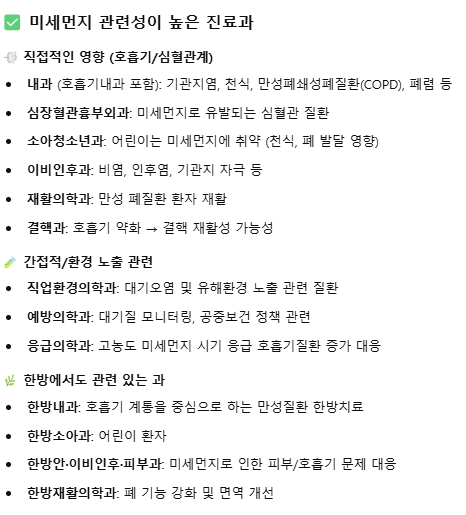

In [401]:
dust_related_depts = [
    'ÎÇ¥Í≥º', 'Ïù¥ÎπÑÏù∏ÌõÑÍ≥º', 'Ïã¨Ïû•ÌòàÍ¥ÄÌùâÎ∂ÄÏô∏Í≥º', 'ÏÜåÏïÑÏ≤≠ÏÜåÎÖÑÍ≥º',
    'Ïû¨ÌôúÏùòÌïôÍ≥º', 'Í≤∞ÌïµÍ≥º', 'ÌïúÎ∞©ÎÇ¥Í≥º', 'ÌïúÎ∞©ÏÜåÏïÑÍ≥º',
    'ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º', 'ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º'
]

df_detail = df_detail[df_detail['ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö'].isin(dust_related_depts)]

df_detail.drop(columns=['ÏïîÌò∏ÌôîÏöîÏñëÍ∏∞Ìò∏','ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìú'],inplace=True)

In [402]:
df_detail['ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö'].unique()

array(['ÎÇ¥Í≥º', 'Ïã¨Ïû•ÌòàÍ¥ÄÌùâÎ∂ÄÏô∏Í≥º', 'ÏÜåÏïÑÏ≤≠ÏÜåÎÖÑÍ≥º', 'Ïù¥ÎπÑÏù∏ÌõÑÍ≥º', 'Í≤∞ÌïµÍ≥º', 'Ïû¨ÌôúÏùòÌïôÍ≥º', 'ÌïúÎ∞©ÎÇ¥Í≥º',
       'ÌïúÎ∞©ÏÜåÏïÑÍ≥º', 'ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º', 'ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º'], dtype=object)

In [403]:
df_detail.head()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö  Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò  ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê Ïó¨ÏùòÎèÑÏÑ±Î™®Î≥ëÏõê      ÎÇ¥Í≥º        34         0
1         Ï§ëÏïôÎåÄÌïôÍµêÎ≥ëÏõê      ÎÇ¥Í≥º        59         0
2    ÌïúÎ¶ºÎåÄÌïôÍµê Í∞ïÎÇ®ÏÑ±Ïã¨Î≥ëÏõê      ÎÇ¥Í≥º        39         0
3    ÌïúÎ¶ºÎåÄÌïôÍµê ÌïúÍ∞ïÏÑ±Ïã¨Î≥ëÏõê      ÎÇ¥Í≥º         1         0
4         ÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê      ÎÇ¥Í≥º       183         0

In [404]:
df_detail = pd.merge(df_detail, df_final[['ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö', 'Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)','ÏãúÎèÑÏΩîÎìúÎ™Ö','ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö','ÏùçÎ©¥Îèô']], on='ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö', how='left')


In [405]:
df_detail.head()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö  Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò  ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò       Ï¢åÌëú(X)      Ï¢åÌëú(Y) ÏãúÎèÑÏΩîÎìúÎ™Ö  \
0  Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê Ïó¨ÏùòÎèÑÏÑ±Î™®Î≥ëÏõê      ÎÇ¥Í≥º        34         0  126.936752  37.518325    ÏÑúÏö∏   
1         Ï§ëÏïôÎåÄÌïôÍµêÎ≥ëÏõê      ÎÇ¥Í≥º        59         0  126.960784  37.506748    ÏÑúÏö∏   
2    ÌïúÎ¶ºÎåÄÌïôÍµê Í∞ïÎÇ®ÏÑ±Ïã¨Î≥ëÏõê      ÎÇ¥Í≥º        39         0  126.908653  37.493726    ÏÑúÏö∏   
3    ÌïúÎ¶ºÎåÄÌïôÍµê ÌïúÍ∞ïÏÑ±Ïã¨Î≥ëÏõê      ÎÇ¥Í≥º         1         0  126.909681  37.523170    ÏÑúÏö∏   
4         ÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê      ÎÇ¥Í≥º       183         0  126.999017  37.579715    ÏÑúÏö∏   

  ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö     ÏùçÎ©¥Îèô  
0   ÏòÅÎì±Ìè¨Íµ¨    Ïó¨ÏùòÎèÑÎèô  
1    ÎèôÏûëÍµ¨     ÌùëÏÑùÎèô  
2   ÏòÅÎì±Ìè¨Íµ¨     ÎåÄÎ¶ºÎèô  
3   ÏòÅÎì±Ìè¨Íµ¨  ÏòÅÎì±Ìè¨Îèô7Í∞Ä  
4    Ï¢ÖÎ°úÍµ¨     Ïó∞Í±¥Îèô

In [406]:
df_detail[['Ï¢åÌëú(X)', 'Ï¢åÌëú(Y)']].isna().any(axis=1).sum()

1

In [407]:
df_detail['ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö'].value_counts()

ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö
ÌïúÎ∞©ÎÇ¥Í≥º            110656
ÎÇ¥Í≥º              101879
ÌïúÎ∞©ÏÜåÏïÑÍ≥º           101221
ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º     97729
ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º          85542
ÏÜåÏïÑÏ≤≠ÏÜåÎÖÑÍ≥º           77866
Ïù¥ÎπÑÏù∏ÌõÑÍ≥º            70822
Ïû¨ÌôúÏùòÌïôÍ≥º            21666
Ïã¨Ïû•ÌòàÍ¥ÄÌùâÎ∂ÄÏô∏Í≥º          3051
Í≤∞ÌïµÍ≥º                931
Name: count, dtype: int64

In [408]:
df_detail.isnull().sum()

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö       0
ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö     0
Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò    0
ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò    0
Ï¢åÌëú(X)       1
Ï¢åÌëú(Y)       1
ÏãúÎèÑÏΩîÎìúÎ™Ö       1
ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö      1
ÏùçÎ©¥Îèô         1
dtype: int64

In [409]:
df_detail[df_detail['Ï¢åÌëú(X)'].isna() & df_detail['Ï¢åÌëú(Y)'].isna()]

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö  Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò  ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò  Ï¢åÌëú(X)  Ï¢åÌëú(Y) ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö  ÏùçÎ©¥Îèô
97963  Í¥ëÏ£ºÍµêÎèÑÏÜåÎ∂ÄÏÜçÏùòÏõê      ÎÇ¥Í≥º         0         0    NaN    NaN   NaN    NaN  NaN

In [410]:
#Í¥ëÏ£ºÍµêÎèÑÏÜåÎ∂ÄÏÜçÏùòÏõêÏùÄ ÏÇ≠Ï†úÌïòÍ≤†Ïùå.
df_detail = df_detail[df_detail['ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö'] != 'Í¥ëÏ£ºÍµêÎèÑÏÜåÎ∂ÄÏÜçÏùòÏõê']
df_detail[df_detail['Ï¢åÌëú(X)'].isna() & df_detail['Ï¢åÌëú(Y)'].isna()]

Empty DataFrame
Columns: [ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö, ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö, Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò, ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò, Ï¢åÌëú(X), Ï¢åÌëú(Y), ÏãúÎèÑÏΩîÎìúÎ™Ö, ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö, ÏùçÎ©¥Îèô]
Index: []

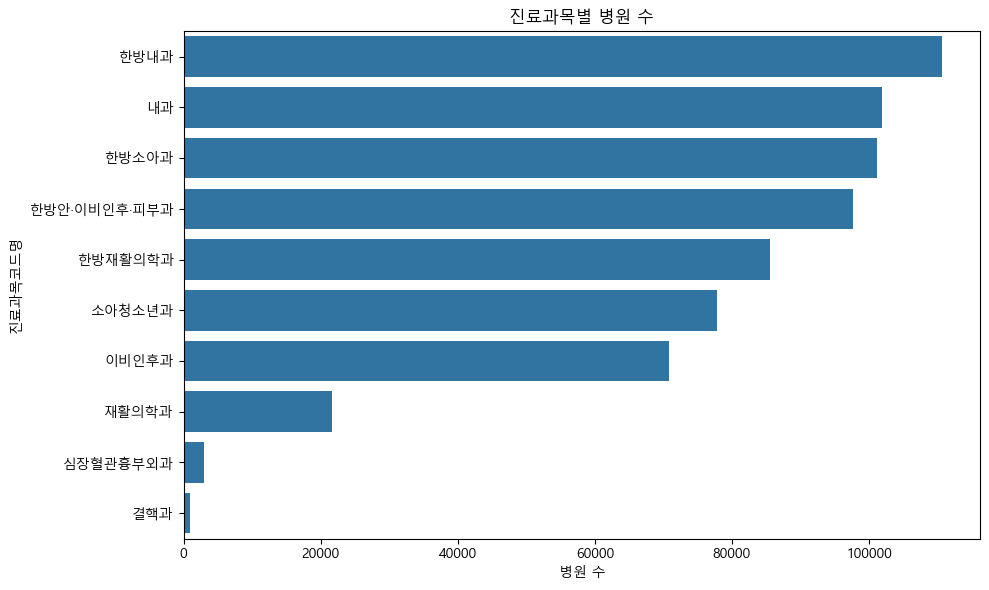

In [411]:
plt.rc('font', family='Malgun Gothic')

counts = df_detail['ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(y=counts.index, x=counts.values)
plt.title("ÏßÑÎ£åÍ≥ºÎ™©Î≥Ñ Î≥ëÏõê Ïàò")
plt.xlabel("Î≥ëÏõê Ïàò")
plt.tight_layout()
plt.show()

In [413]:
# 1. Î≥ëÏõê dfÎ•º GeoDataFrameÏúºÎ°ú Î≥ÄÌôò
df_detail['geometry'] = df_detail.apply(lambda row: Point(row['Ï¢åÌëú(X)'], row['Ï¢åÌëú(Y)']), axis=1)
df_detail = gpd.GeoDataFrame(df_detail, geometry='geometry', crs="EPSG:4326")

# 2. ÏÉùÌôúÍ∂å GeoJSON Î∂àÎü¨Ïò§Í∏∞
gdf_living = gpd.read_file("data/onlyÏÉùÌôúÍ∂å.geojson")
gdf_living['ID'] = gdf_living['ID'].astype(int)

# 3. Í≥µÍ∞Ñ Ï°∞Ïù∏ (Î≥ëÏõêÏù¥ Ìè¨Ìï®Îêú ÏÉùÌôúÍ∂å IDÎ•º Îß§Ìïë)
df_detail = gpd.sjoin(df_detail, gdf_living[['ID', 'geometry']], how='left', predicate='within')

# 5. ÌïÑÏöîÏãú Ï†ÄÏû•
# df_final.to_file("Î≥ëÏõê_ÏÉùÌôúÍ∂å_Îß§ÌïëÍ≤∞Í≥º.geojson", driver="GeoJSON")
df_detail

ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö  ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö  Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò  ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò       Ï¢åÌëú(X)      Ï¢åÌëú(Y)  \
0       Í∞ÄÌÜ®Î¶≠ÎåÄÌïôÍµê Ïó¨ÏùòÎèÑÏÑ±Î™®Î≥ëÏõê       ÎÇ¥Í≥º        34         0  126.936752  37.518325   
1              Ï§ëÏïôÎåÄÌïôÍµêÎ≥ëÏõê       ÎÇ¥Í≥º        59         0  126.960784  37.506748   
2         ÌïúÎ¶ºÎåÄÌïôÍµê Í∞ïÎÇ®ÏÑ±Ïã¨Î≥ëÏõê       ÎÇ¥Í≥º        39         0  126.908653  37.493726   
3         ÌïúÎ¶ºÎåÄÌïôÍµê ÌïúÍ∞ïÏÑ±Ïã¨Î≥ëÏõê       ÎÇ¥Í≥º         1         0  126.909681  37.523170   
4              ÏÑúÏö∏ÎåÄÌïôÍµêÎ≥ëÏõê       ÎÇ¥Í≥º       183         0  126.999017  37.579715   
...                ...      ...       ...       ...         ...        ...   
671358         ÎçîÌñâÎ≥µÏöîÏñëÎ≥ëÏõê  ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º         0         0  126.704166  37.454260   
671359     ÏïàÏñëÏÑúÏö∏ ÎåÄÌö®ÏöîÏñëÎ≥ëÏõê  ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º         0         0  126.918372  37.398955   
671360        ÏÇºÏÑ±Ïö∞Î¶¨ÏöîÏñëÎ≥ëÏõê  ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º         0         0  127.041961  37.214627   
671361       Î°úÌïòÏä§Ïö©Ïù∏ÏöîÏñëÎ≥ëÏõê  ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º         0         0  127.198640  37.235046   
671362        ÏïàÏÇ∞Ï§ëÏïôÏöîÏñëÎ≥ëÏõê  ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º         0         0  126.840968  37.318596   

       ÏãúÎèÑÏΩîÎìúÎ™Ö ÏãúÍµ∞Íµ¨ÏΩîÎìúÎ™Ö     ÏùçÎ©¥Îèô                    geometry  index_right      ID  
0         ÏÑúÏö∏   ÏòÅÎì±Ìè¨Íµ¨    Ïó¨ÏùòÎèÑÎèô  POINT (126.93675 37.51833)        250.0   251.0  
1         ÏÑúÏö∏    ÎèôÏûëÍµ¨     ÌùëÏÑùÎèô  POINT (126.96078 37.50675)        269.0   270.0  
2         ÏÑúÏö∏   ÏòÅÎì±Ìè¨Íµ¨     ÎåÄÎ¶ºÎèô  POINT (126.90865 37.49373)        262.0   263.0  
3         ÏÑúÏö∏   ÏòÅÎì±Ìè¨Íµ¨  ÏòÅÎì±Ìè¨Îèô7Í∞Ä  POINT (126.90968 37.52317)        249.0   250.0  
4         ÏÑúÏö∏    Ï¢ÖÎ°úÍµ¨     Ïó∞Í±¥Îèô  POINT (126.99902 37.57972)          3.0     4.0  
...      ...    ...     ...                         ...          ...     ...  
671358    Ïù∏Ï≤ú  Ïù∏Ï≤úÎÇ®ÎèôÍµ¨     Íµ¨ÏõîÎèô  POINT (126.70417 37.45426)        668.0   672.0  
671359    Í≤ΩÍ∏∞  ÏïàÏñëÎßåÏïàÍµ¨     ÏïàÏñëÎèô  POINT (126.91837 37.39896)       1022.0  1027.0  
671360    Í≤ΩÍ∏∞    ÌôîÏÑ±Ïãú     ÏßÑÏïàÎèô  POINT (127.04196 37.21463)       1348.0  1358.0  
671361    Í≤ΩÍ∏∞  Ïö©Ïù∏Ï≤òÏù∏Íµ¨    ÍπÄÎüâÏû•Îèô  POINT (127.19864 37.23505)       1268.0  1278.0  
671362    Í≤ΩÍ∏∞  ÏïàÏÇ∞Îã®ÏõêÍµ¨     Í≥†ÏûîÎèô   POINT (126.84097 37.3186)       1130.0  1137.0  

[671362 rows x 12 columns]

In [414]:
# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
gdf_zone = gpd.read_file("data/onlyÏÉùÌôúÍ∂å.geojson")

# 2. Ï∑®ÏïΩÏù∏Íµ¨Ïàò Í≥ÑÏÇ∞
gdf_zone["Ï∑®ÏïΩÏù∏Íµ¨Ïàò"] = gdf_zone["Ïñ¥Î¶∞Ïù¥"] + gdf_zone["ÎÖ∏Ïù∏"]

# 3. ÏßÑÎ£åÍ≥ºÎ™©Î≥Ñ Î≥ëÏõê Ïàò Î∞è Ï†ÑÎ¨∏Ïùò Ïàò Í≥ÑÏÇ∞
df_detail["Ï†ÑÎ¨∏ÏùòÏàò"] = df_detail["Í≥ºÎ™©Î≥Ñ Ï†ÑÎ¨∏ÏùòÏàò"] + df_detail["ÏÑ†ÌÉùÏßÑÎ£å ÏùòÏÇ¨Ïàò"]

# 4. ÏÉùÌôúÍ∂å IDÎ≥Ñ ÏßÑÎ£åÍ≥ºÎ™©Î≥Ñ ÏßëÍ≥Ñ
grouped = df_detail.groupby(["ID", "ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö"]).agg(
    Î≥ëÏõêÏàò=("ÏöîÏñëÍ∏∞Í¥ÄÎ™Ö", "count"),
    Ï†ÑÎ¨∏ÏùòÏàò=("Ï†ÑÎ¨∏ÏùòÏàò", "sum")
).reset_index()

# 5. ÌîºÎ≤óÏúºÎ°ú ID Í∏∞Ï§Ä wide ÌòïÌÉúÎ°ú Î≥ÄÌôò
pivot_hospital = grouped.pivot(index="ID", columns="ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö", values="Î≥ëÏõêÏàò").add_prefix("Î≥ëÏõêÏàò_")
pivot_doctor = grouped.pivot(index="ID", columns="ÏßÑÎ£åÍ≥ºÎ™©ÏΩîÎìúÎ™Ö", values="Ï†ÑÎ¨∏ÏùòÏàò").add_prefix("Ï†ÑÎ¨∏ÏùòÏàò_")

# 6. Î≥ëÏõêÏàòÏôÄ Ï†ÑÎ¨∏ÏùòÏàòÎ•º Ìï©Ïπ®
df_medical = pd.concat([pivot_hospital, pivot_doctor], axis=1).reset_index()

# 7. ÏÉùÌôúÍ∂å geojsonÍ≥º Î≥ëÌï©
gdf_result = gdf_zone.merge(df_medical, on="ID", how="left")
gdf_result = gdf_result.fillna(0)  # Í≤∞Ï∏°Í∞í 0ÏúºÎ°ú Ï≤òÎ¶¨


m = folium.Map(location=[36.5, 127.8], zoom_start=7)

gdf_result.columns
# 8. Ï†ÄÏû•
#gdf_result.to_file("ÏÉùÌôúÍ∂å_ÏùòÎ£åÏÉÅÏÑ∏.geojson", driver="GeoJSON")

Index(['ID', 'adm_nm', 'adm_cd2', 'sgg', 'sido', 'sidonm', 'sggnm', 'adm_cd',
       'ÏãúÎèÑ', 'ÏãúÍµ∞Íµ¨', 'ÏùçÎ©¥Îèô', 'ÌñâÏ†ïÍ∏∞Í¥ÄÏΩîÎìú', 'Ï¥ùÏù∏Íµ¨Ïàò', 'Ïñ¥Î¶∞Ïù¥', 'ÎÖ∏Ïù∏', 'geometry', 'Ï∑®ÏïΩÏù∏Íµ¨Ïàò',
       'Î≥ëÏõêÏàò_Í≤∞ÌïµÍ≥º', 'Î≥ëÏõêÏàò_ÎÇ¥Í≥º', 'Î≥ëÏõêÏàò_ÏÜåÏïÑÏ≤≠ÏÜåÎÖÑÍ≥º', 'Î≥ëÏõêÏàò_Ïã¨Ïû•ÌòàÍ¥ÄÌùâÎ∂ÄÏô∏Í≥º', 'Î≥ëÏõêÏàò_Ïù¥ÎπÑÏù∏ÌõÑÍ≥º',
       'Î≥ëÏõêÏàò_Ïû¨ÌôúÏùòÌïôÍ≥º', 'Î≥ëÏõêÏàò_ÌïúÎ∞©ÎÇ¥Í≥º', 'Î≥ëÏõêÏàò_ÌïúÎ∞©ÏÜåÏïÑÍ≥º', 'Î≥ëÏõêÏàò_ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º', 'Î≥ëÏõêÏàò_ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º',
       'Ï†ÑÎ¨∏ÏùòÏàò_Í≤∞ÌïµÍ≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_ÎÇ¥Í≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_ÏÜåÏïÑÏ≤≠ÏÜåÎÖÑÍ≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_Ïã¨Ïû•ÌòàÍ¥ÄÌùâÎ∂ÄÏô∏Í≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_Ïù¥ÎπÑÏù∏ÌõÑÍ≥º',
       'Ï†ÑÎ¨∏ÏùòÏàò_Ïû¨ÌôúÏùòÌïôÍ≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©ÎÇ¥Í≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©ÏÜåÏïÑÍ≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º',
       'Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º'],
      dtype='object')

In [ ]:
target_cols = [
    'Î≥ëÏõêÏàò_ÎÇ¥Í≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_ÎÇ¥Í≥º',
    'Î≥ëÏõêÏàò_Ïù¥ÎπÑÏù∏ÌõÑÍ≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_Ïù¥ÎπÑÏù∏ÌõÑÍ≥º',
    'Î≥ëÏõêÏàò_Í≤∞ÌïµÍ≥º', 'Ï†ÑÎ¨∏ÏùòÏàò_Í≤∞ÌïµÍ≥º'
]

# 1. Ï†ïÍ∑úÌôî
scaler = MinMaxScaler()
gdf_map_scaled = gdf_result.copy()
gdf_map_scaled[target_cols] = scaler.fit_transform(gdf_map_scaled[target_cols])

# 2. Í≥ºÎ™©Î≥Ñ ÏßÄÏàò Í≥ÑÏÇ∞ (Í∞ÄÏ§ëÌï©: Î≥ëÏõê Ïàò 40%, Ï†ÑÎ¨∏Ïùò Ïàò 60%)
for subject in ['ÎÇ¥Í≥º', 'Ïù¥ÎπÑÏù∏ÌõÑÍ≥º', 'Í≤∞ÌïµÍ≥º']:
    hosp_col = f'Î≥ëÏõêÏàò_{subject}'
    doc_col = f'Ï†ÑÎ¨∏ÏùòÏàò_{subject}'
    gdf_map_scaled[f'{subject}_ÏßÄÏàò'] = 0.4 * gdf_map_scaled[hosp_col] + 0.6 * gdf_map_scaled[doc_col]

gdf_map_scaled['ÏùòÎ£åÏ¢ÖÌï©ÏßÄÏàò'] = gdf_map_scaled[[f'{s}_ÏßÄÏàò' for s in ['ÎÇ¥Í≥º', 'Ïù¥ÎπÑÏù∏ÌõÑÍ≥º', 'Í≤∞ÌïµÍ≥º']]].mean(axis=1)

# Ïù∏Íµ¨ 1ÎßåÎ™ÖÎãπ ÏùòÏÇ¨ Ïàò = (Ï†ÑÎ¨∏Ïùò Ïàò / Ï¥ùÏù∏Íµ¨Ïàò) * 1000
for subject in ['ÎÇ¥Í≥º', 'Ïù¥ÎπÑÏù∏ÌõÑÍ≥º', 'Í≤∞ÌïµÍ≥º']:
    gdf_result[f'ÏùòÏÇ¨Î∞ÄÎèÑ_{subject}'] = gdf_result[f'Ï†ÑÎ¨∏ÏùòÏàò_{subject}'] / gdf_result['Ï¥ùÏù∏Íµ¨Ïàò'] * 1000


gdf_map_scaled['ÏùòÎ£åÏßÄÏàò_Î£®Ìä∏'] = np.sqrt(gdf_map_scaled['ÏùòÎ£åÏ¢ÖÌï©ÏßÄÏàò'])

# ÏÉâÏÉÅ Îßµ Ï†ïÏùò
colormap = cm.linear.YlOrRd_09.scale(
    gdf_map_scaled['ÏùòÎ£åÏßÄÏàò_Î£®Ìä∏'].min(),
    gdf_map_scaled['ÏùòÎ£åÏßÄÏàò_Î£®Ìä∏'].max()
)
colormap.caption = "ÏÉùÌôúÍ∂å ÏùòÎ£å Ï¢ÖÌï© ÏßÄÏàò (Î£®Ìä∏ Ïä§ÏºÄÏùº)"

# ÏßÄÎèÑ ÏÉùÏÑ±
m = folium.Map(location=[36.5, 127.8], zoom_start=7)
# GeoJson ÏãúÍ∞ÅÌôî
folium.GeoJson(
    gdf_map_scaled,
    name="ÏÉùÌôúÍ∂å ÏùòÎ£å Ï¢ÖÌï© ÏßÄÏàò",
    tooltip=folium.GeoJsonTooltip(
        fields=["ID", "ÏùçÎ©¥Îèô", "Ï¥ùÏù∏Íµ¨Ïàò", "Ïñ¥Î¶∞Ïù¥", "ÎÖ∏Ïù∏", "ÏùòÎ£åÏßÄÏàò_Î£®Ìä∏"],
        aliases=["ID", "ÏùçÎ©¥Îèô", "Ï¥ùÏù∏Íµ¨Ïàò", "Ïñ¥Î¶∞Ïù¥", "ÎÖ∏Ïù∏", "ÏùòÎ£åÏßÄÏàò_Î£®Ìä∏"],
        localize=True
    ),
    style_function=lambda feature: {
        "fillColor": colormap(feature["properties"]["ÏùòÎ£åÏßÄÏàò_Î£®Ìä∏"]) if feature["properties"]["ÏùòÎ£åÏßÄÏàò_Î£®Ìä∏"] else "lightgray",
        "color": "black",
        "weight": 0.3,
        "fillOpacity": 0.7,
    },
).add_to(m)

colormap.add_to(m)
# 10. Ï†ÄÏû•  
m.save("ÏÉùÌôúÍ∂å_Î≥ëÏõê2.html")


In [415]:
threshold = gdf_map_scaled['ÏùòÎ£åÏ¢ÖÌï©ÏßÄÏàò'].quantile(0.2)
gdf_map_scaled['ÏùòÎ£åÏ∑®ÏïΩ'] = gdf_map_scaled['ÏùòÎ£åÏ¢ÖÌï©ÏßÄÏàò'] <= threshold

In [416]:
gdf_map_scaled

ID           adm_nm     adm_cd2    sgg sido   sidonm sggnm    adm_cd  \
0        1    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ ÏÇ¨ÏßÅÎèô  1111053000  11110   11    ÏÑúÏö∏ÌäπÎ≥ÑÏãú   Ï¢ÖÎ°úÍµ¨  11010530   
1        2    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Î∂ÄÏïîÎèô  1111055000  11110   11    ÏÑúÏö∏ÌäπÎ≥ÑÏãú   Ï¢ÖÎ°úÍµ¨  11010550   
2        3    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Î¨¥ÏïÖÎèô  1111057000  11110   11    ÏÑúÏö∏ÌäπÎ≥ÑÏãú   Ï¢ÖÎ°úÍµ¨  11010570   
3        4    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Í∞ÄÌöåÎèô  1111060000  11110   11    ÏÑúÏö∏ÌäπÎ≥ÑÏãú   Ï¢ÖÎ°úÍµ¨  11010600   
4        5   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï¢ÖÎ°úÍµ¨ Ï∞ΩÏã†1Îèô  1111067000  11110   11    ÏÑúÏö∏ÌäπÎ≥ÑÏãú   Ï¢ÖÎ°úÍµ¨  11010670   
...    ...              ...         ...    ...  ...      ...   ...       ...   
2110  2123  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ Í≥†Ï∞ΩÍµ∞ Í≥†ÏàòÎ©¥  5279031000  52790   52  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   Í≥†Ï∞ΩÍµ∞  35570310   
2111  2124  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ Í≥†Ï∞ΩÍµ∞ Ìù•ÎçïÎ©¥  5279040000  52790   52  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   Í≥†Ï∞ΩÍµ∞  35570400   
2112  2125  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ Î∂ÄÏïàÍµ∞ Î∂ÄÏïàÏùç  5280025000  52800   52  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   Î∂ÄÏïàÍµ∞  35580110   
2113  2126  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ Î∂ÄÏïàÍµ∞ Ï£ºÏÇ∞Î©¥  5280031000  52800   52  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   Î∂ÄÏïàÍµ∞  35580310   
2114  2127  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ Î∂ÄÏïàÍµ∞ ÌïòÏÑúÎ©¥  5280040000  52800   52  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   Î∂ÄÏïàÍµ∞  35580400   

                                                     ÏãúÎèÑ  \
0                                     ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
1                                           ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
2                                           ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
3                               ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
4                                     ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú;ÏÑúÏö∏ÌäπÎ≥ÑÏãú   
...                                                 ...   
2110  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπò...   
2111                    Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   
2112                                            Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   
2113  Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπò...   
2114                            Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ;Ï†ÑÎ∂ÅÌäπÎ≥ÑÏûêÏπòÎèÑ   

                                      ÏãúÍµ∞Íµ¨  ... Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©ÎÇ¥Í≥º Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©ÏÜåÏïÑÍ≥º  \
0                             Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨  ...       2.0        0.0   
1                                 Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨  ...       1.0        0.0   
2                                 Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨  ...       0.0        0.0   
3                         Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨  ...      20.0        1.0   
4                             Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨;Ï¢ÖÎ°úÍµ¨  ...       7.0        1.0   
...                                   ...  ...       ...        ...   
2110  Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞  ...       0.0        0.0   
2111                      Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞;Í≥†Ï∞ΩÍµ∞  ...       0.0        0.0   
2112                                  Î∂ÄÏïàÍµ∞  ...       9.0        1.0   
2113  Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞  ...       0.0        0.0   
2114                          Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞;Î∂ÄÏïàÍµ∞  ...       0.0        0.0   

      Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©Ïïà¬∑Ïù¥ÎπÑÏù∏ÌõÑ¬∑ÌîºÎ∂ÄÍ≥º  Ï†ÑÎ¨∏ÏùòÏàò_ÌïúÎ∞©Ïû¨ÌôúÏùòÌïôÍ≥º     ÎÇ¥Í≥º_ÏßÄÏàò  Ïù¥ÎπÑÏù∏ÌõÑÍ≥º_ÏßÄÏàò  Í≤∞ÌïµÍ≥º_ÏßÄÏàò    ÏùòÎ£åÏ¢ÖÌï©ÏßÄÏàò  \
0                   0.0           1.0  0.146997  0.043200     0.0  0.063399   
1                   0.0           0.0  0.006612  0.004301     0.0  0.003638   
2                   0.0         

In [417]:

gdf_map_scaled.to_file("ÏÉùÌôúÍ∂å_Î≥ëÏõê2.geojson", driver="GeoJSON")
gdf_map_scaled.to_csv("Î≥ëÏõê2_Ï∑®ÏïΩÏÉùÌôúÍ∂å_Í≤∞Í≥º.csv", index=False, encoding='utf-8-sig')

# Í≤∞Î°†

ÏÑ∏Ï¢Ö,Í¥ëÏ£º,ÎåÄÏ†Ñ Î∞∑.